In [1]:
import numpy as np
import pandas as pd

from google.colab import drive
from google.colab import data_table
from google.colab import files

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/peanutbutterjelly_1.xlsx')
data1 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/IAQF_masterfile_values.xlsx', sheet_name="Weights")

In [3]:
data = data.drop(data.columns[[0,3,4]], axis=1).drop(data.index[[0,1]], axis=0)
data = data.rename(columns={"Unnamed: 1": "date"})
data = data.set_index("date")

/usr/local/lib/python3.11/dist-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


In [4]:
data1 = data1.drop(list(range(0, 752)) + [3802], axis=0)
data1 = data1.rename(columns={"Date": "date"})
data1 = data1.set_index("date")

In [5]:
data

30 day   90 day
date                        
2013-01-02  12.6398  14.4688
2013-01-03  12.5386   14.502
2013-01-04  11.6178  14.0555
2013-01-07  11.6415  14.3456
2013-01-08  11.7402  14.2868
...             ...      ...
2025-02-10  12.1883  13.2292
2025-02-11  11.9594  13.1725
2025-02-12  12.8288  13.6507
2025-02-13  11.8625  13.3425
2025-02-14  11.4887  13.0875

[3050 rows x 2 columns]

In [6]:
data1

NVDA UW Equity  META UW Equity  TSLA UW Equity  AMZN UW Equity  \
date                                                                         
2013-01-02        0.000654        0.004852        0.000327        0.009600   
2013-01-03        0.000653        0.004905        0.000328        0.009676   
2013-01-04        0.000662        0.005052        0.000335        0.009707   
2013-01-07        0.000664        0.005019        0.000330        0.009768   
2013-01-08        0.000683        0.005174        0.000325        0.009748   
...                    ...             ...             ...             ...   
2025-02-10        0.057412        0.032864        0.021935        0.045751   
2025-02-11        0.058472        0.033290        0.021389        0.044656   
2025-02-12        0.059751        0.033201        0.020607        0.045131   
2025-02-13        0.059415        0.033317        0.019303        0.045064   
2025-02-14        0.058838        0.033671        0.019830        0.044448   

            GOOGL UW Equity  MSFT UW Equity  AAPL UW Equity  A UN Equity  \
date                                                                       
2013-01-02         0.019882        0.019315        0.041421     0.001198   
2013-01-03         0.019770        0.019135        0.042648     0.001212   
2013-01-04         0.019793        0.019388        0.043013     0.001214   
2013-01-07         0.019839        0.019156        0.042572     0.001220   
2013-01-08         0.020137        0.018717        0.041169     0.001238   
...                     ...             ...             ...          ...   
2025-02-10         0.042735        0.056316        0.063826     0.000767   
2025-02-11         0.041742        0.056013        0.062880     0.000762   
2025-02-12         0.041708        0.055975        0.062466     0.000749   
2025-02-13         0.041460        0.055878        0.063839     0.000739   
2025-02-14         0.041203        0.055709        0.065189     0.000722   

            ABBV UN Equity  ABNB UW Equity  ...  WTW UW Equity  WY UN Equity  \
date                                        ...                                
2013-01-02        0.004716             NaN  ...            NaN      0.001291   
2013-01-03        0.004593             NaN  ...            NaN      0.001281   
2013-01-04        0.004623             NaN  ...            NaN      0.001315   
2013-01-07        0.004593             NaN  ...            NaN      0.001317   
2013-01-08        0.004514             NaN  ...            NaN      0.001322   
...                    ...             ...  ...            ...           ...   
2025-02-10        0.006212        0.001550  ...       0.000600      0.000403   
2025-02-11        0.006194        0.001593  ...       0.000603      0.000401   
2025-02-12        0.006144        0.001585  ...       0.000598      0.000400   
2025-02-13        0.006193        0.001577  ...       0.000587      0.000398   
2025-02-14        0.006248        0.001652  ...       0.000589      0.000394   

            WYNN UW Equity  XEL UW Equity  XOM UN Equity  XYL UN Equity  \
date                                                                      
2013-01-02        0.000953            NaN       0.033538       0.000424   
2013-01-03        0.000962            NaN       0.033564       0.000428   
2013-01-04        0.000989            NaN       0.033684       0.000426   
2013-01-07        0.001001            NaN       0.033683       0.000425   
2013-01-08        0.001009            NaN       0.033682       0.000422   
...                    ...            ...            ...            ...   
2025-02-10        0.000161       0.000728       0.008682       0.000582   
2025-02-11        0.000163       0.000729       0.008800       0.000586   
2025-02-12        0.000158       0.000727       0.008909       0.000582   
2025-02-13        0.000154       0.000731       0.008966       0.000586   
2025-02-14        0.000158       0.000735       0.008644       0.00

In [7]:
data_c = pd.DataFrame()
data_c['w_mag7'] = data1.iloc[:,:7].sum(axis=1)
data_c['w_rest'] = 1 - data_c['w_mag7']
data_c

w_mag7    w_rest
date                          
2013-01-02  0.096051  0.903949
2013-01-03  0.097115  0.902885
2013-01-04  0.097950  0.902050
2013-01-07  0.097348  0.902652
2013-01-08  0.095953  0.904047
...              ...       ...
2025-02-10  0.320839  0.679161
2025-02-11  0.318442  0.681558
2025-02-12  0.318839  0.681161
2025-02-13  0.318277  0.681723
2025-02-14  0.318888  0.681112

[3050 rows x 2 columns]

In [8]:
data_30 = pd.concat([data.iloc[:,:1], data_c], axis=1)
data_30

30 day    w_mag7    w_rest
date                                   
2013-01-02  12.6398  0.096051  0.903949
2013-01-03  12.5386  0.097115  0.902885
2013-01-04  11.6178  0.097950  0.902050
2013-01-07  11.6415  0.097348  0.902652
2013-01-08  11.7402  0.095953  0.904047
...             ...       ...       ...
2025-02-10  12.1883  0.320839  0.679161
2025-02-11  11.9594  0.318442  0.681558
2025-02-12  12.8288  0.318839  0.681161
2025-02-13  11.8625  0.318277  0.681723
2025-02-14  11.4887  0.318888  0.681112

[3050 rows x 3 columns]

In [9]:
data_90 = pd.concat([data.iloc[:,1:], data_c], axis=1)
data_90

90 day    w_mag7    w_rest
date                                   
2013-01-02  14.4688  0.096051  0.903949
2013-01-03   14.502  0.097115  0.902885
2013-01-04  14.0555  0.097950  0.902050
2013-01-07  14.3456  0.097348  0.902652
2013-01-08  14.2868  0.095953  0.904047
...             ...       ...       ...
2025-02-10  13.2292  0.320839  0.679161
2025-02-11  13.1725  0.318442  0.681558
2025-02-12  13.6507  0.318839  0.681161
2025-02-13  13.3425  0.318277  0.681723
2025-02-14  13.0875  0.318888  0.681112

[3050 rows x 3 columns]

<ipython-input-10-d5e2b526d490>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(data_30['w_mag7'][top_two30], data_30['30 day'][top_two30], s=5, c='green', alpha=1, marker='o')
<ipython-input-10-d5e2b526d490>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(data_30['30 day'][i], (data_30['w_mag7'][i], data_30['30 day'][i]))


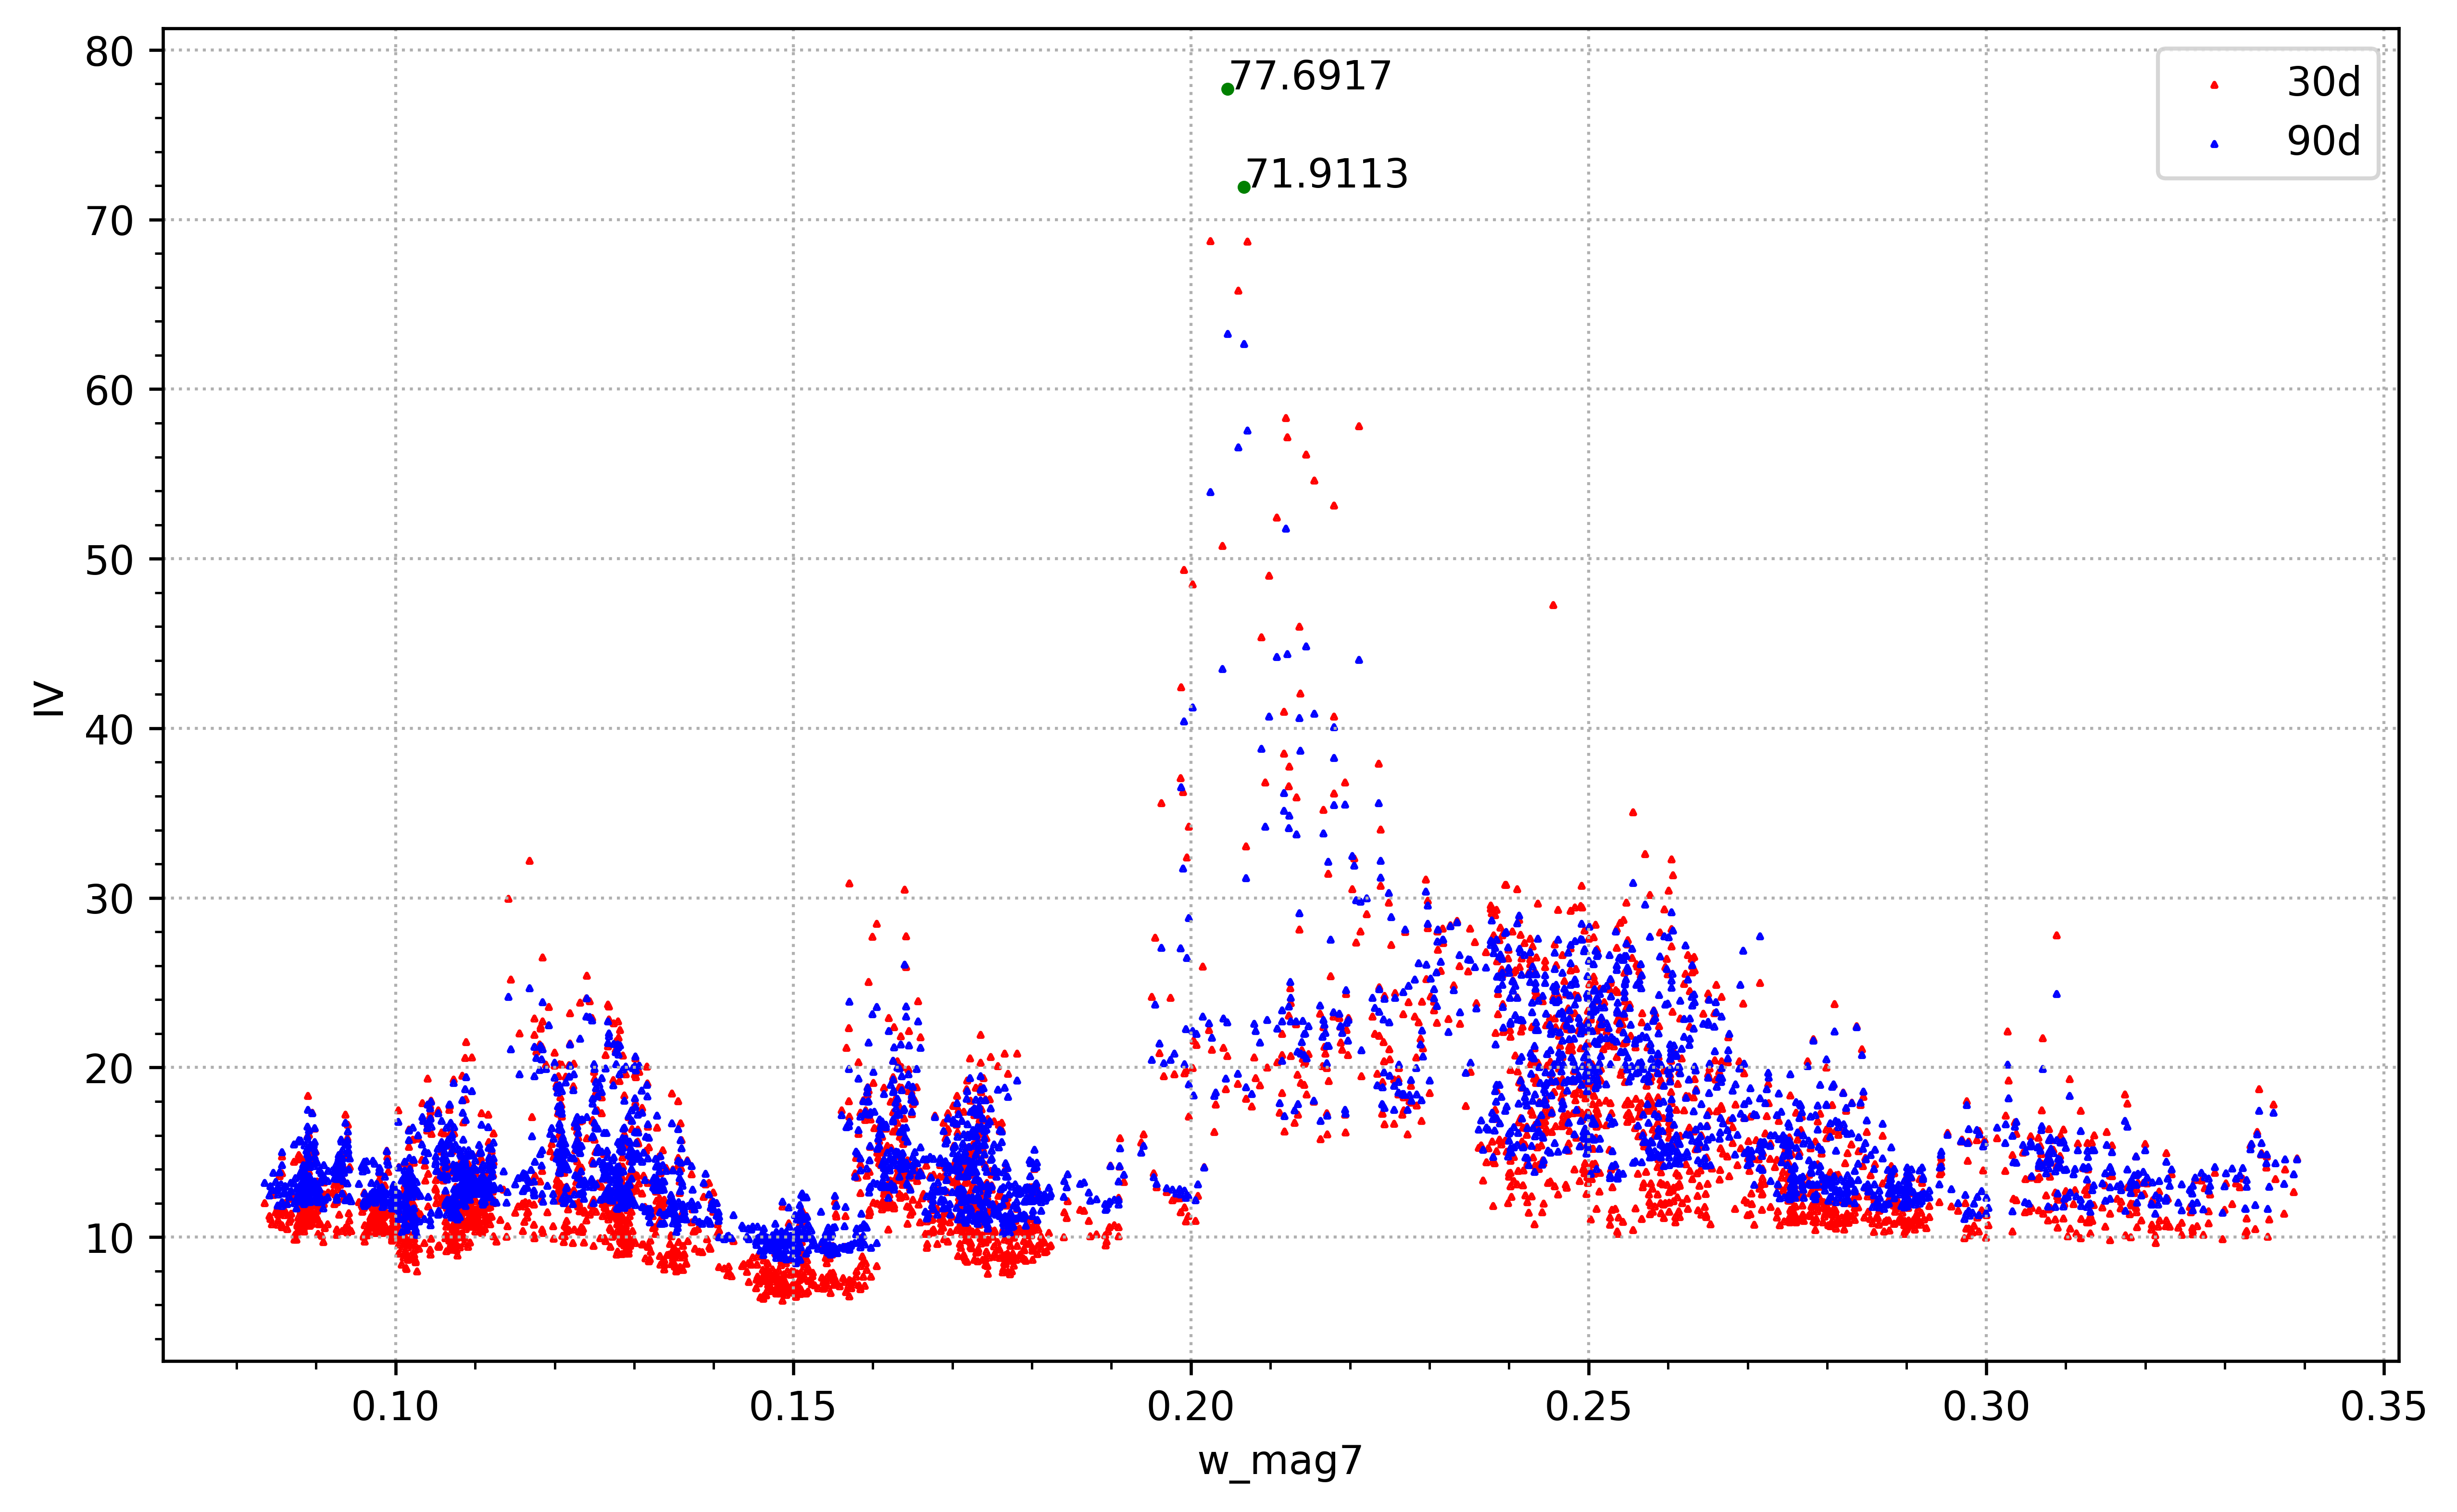

In [10]:
import matplotlib.pyplot as plt

top_two30 = np.argsort(data_30['30 day'])[-2:]
bottom_two90 = np.argsort(data_90['90 day'])[-2:]

plt.figure(figsize=(10, 6), dpi=600)
plt.scatter(data_30['w_mag7'], data_30['30 day'], color='red', marker='^', s=1, label='30d')
plt.scatter(data_90['w_mag7'], data_90['90 day'], color='blue', marker='^', s=1, label='90d')
plt.scatter(data_30['w_mag7'][top_two30], data_30['30 day'][top_two30], s=5, c='green', alpha=1, marker='o')

for i in top_two30:
    plt.annotate(data_30['30 day'][i], (data_30['w_mag7'][i], data_30['30 day'][i]))

#plt.axhline(0, color='green', linewidth=1, alpha=1, label='y=0')
plt.xlabel('w_mag7')
plt.ylabel('IV')
plt.legend()
plt.grid(True, linestyle=':', linewidth=0.75)
plt.minorticks_on()
plt.show()

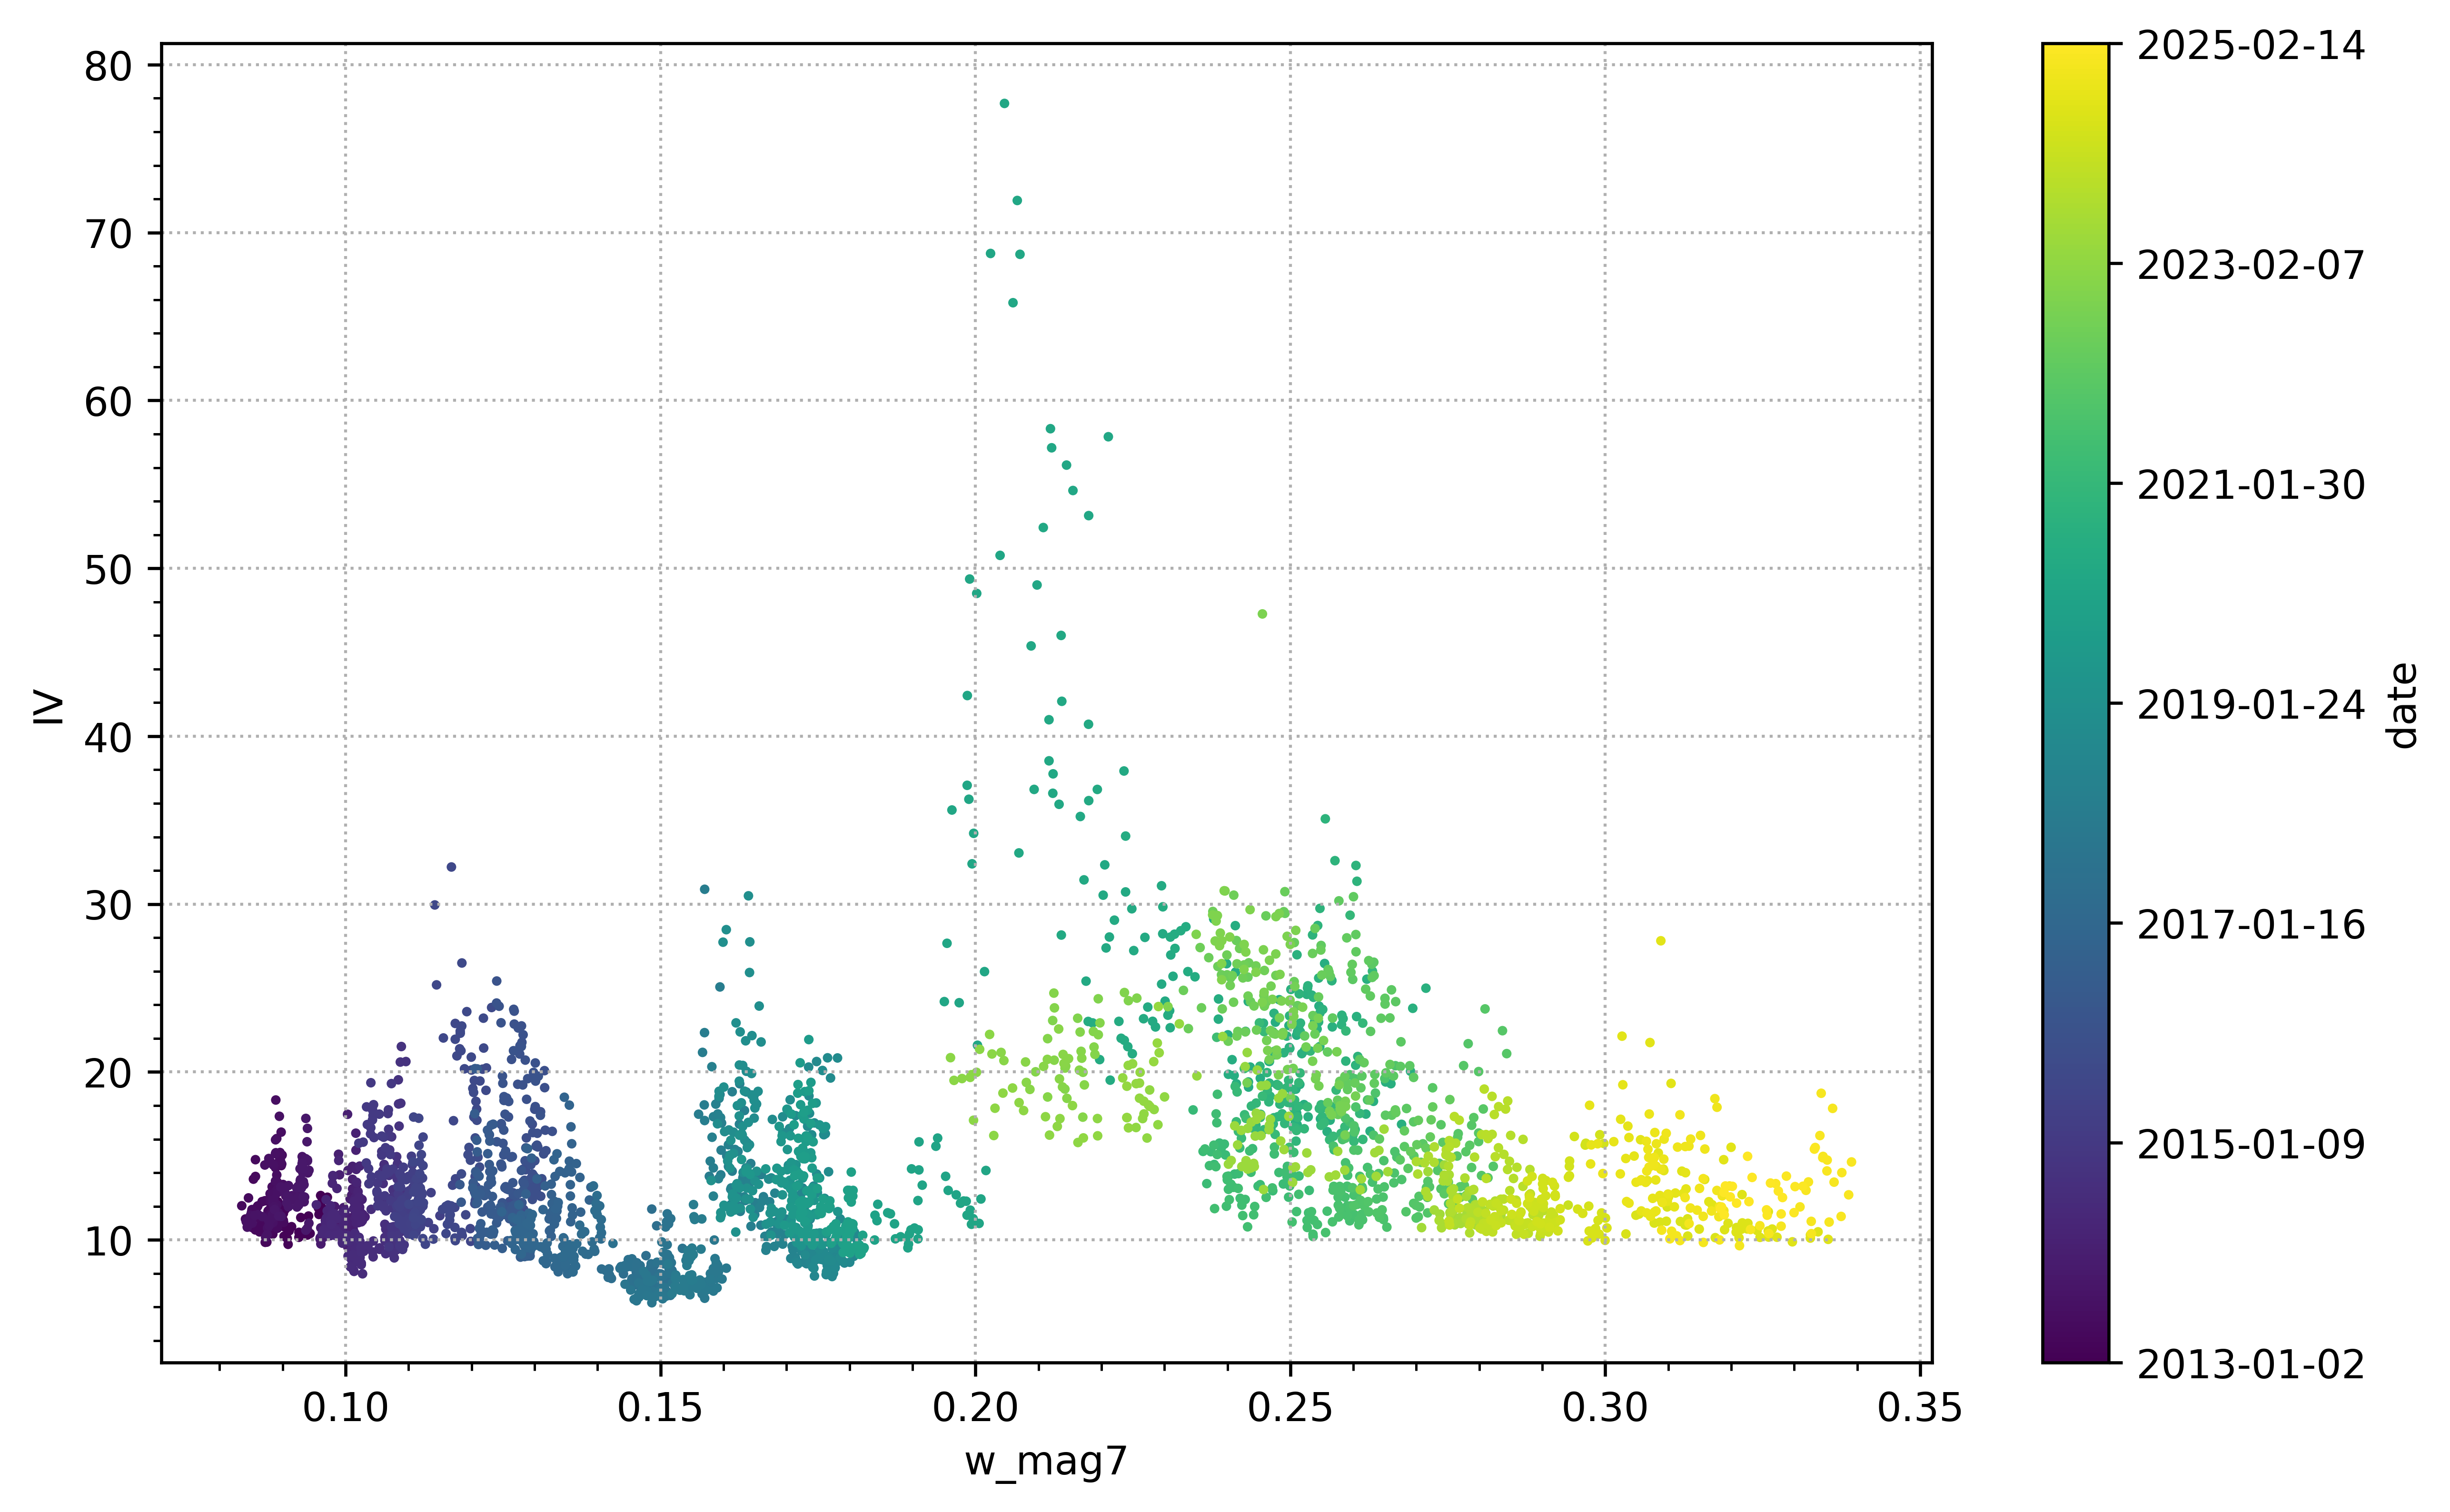

In [11]:
import matplotlib.dates as mdates

data_30['date'] = pd.to_datetime(data_30.index)
data_30.set_index('date', inplace=True)
data_90['date'] = pd.to_datetime(data_90.index)
data_90.set_index('date', inplace=True)

dates_ord = mdates.date2num(data_30.index)
vmin = np.min(dates_ord)
vmax = np.max(dates_ord)

plt.figure(figsize=(10, 6), dpi=600)
plt.scatter(data_30['w_mag7'], data_30['30 day'], c=dates_ord, marker='o', s=2, cmap='viridis', vmin=vmin, vmax=vmax)

plt.xlabel('w_mag7')
plt.ylabel('IV')
plt.grid(True, linestyle=':', linewidth=0.75)
plt.minorticks_on()

cbar = plt.colorbar(label='date')
ticks = np.linspace(vmin, vmax, 7)
date_labels = [mdates.num2date(t).strftime('%Y-%m-%d') for t in ticks]
cbar.set_ticks(ticks)
cbar.set_ticklabels(date_labels)
plt.show()

In [12]:
data_30['30 day'] = data_30['30 day'].astype(float)
data_90['90 day'] = data_90['90 day'].astype(float)

In [13]:
import statsmodels.api as sm

X = data_30['w_mag7']
X = sm.add_constant(X)
y = data_30['30 day']

model = sm.OLS(y, X)
results = model.fit(cov_type='HC3')

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 30 day   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     402.3
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           3.71e-84
Time:                        14:49:59   Log-Likelihood:                -9812.0
No. Observations:                3050   AIC:                         1.963e+04
Df Residuals:                    3048   BIC:                         1.964e+04
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.1242      0.196     51.537      0.0

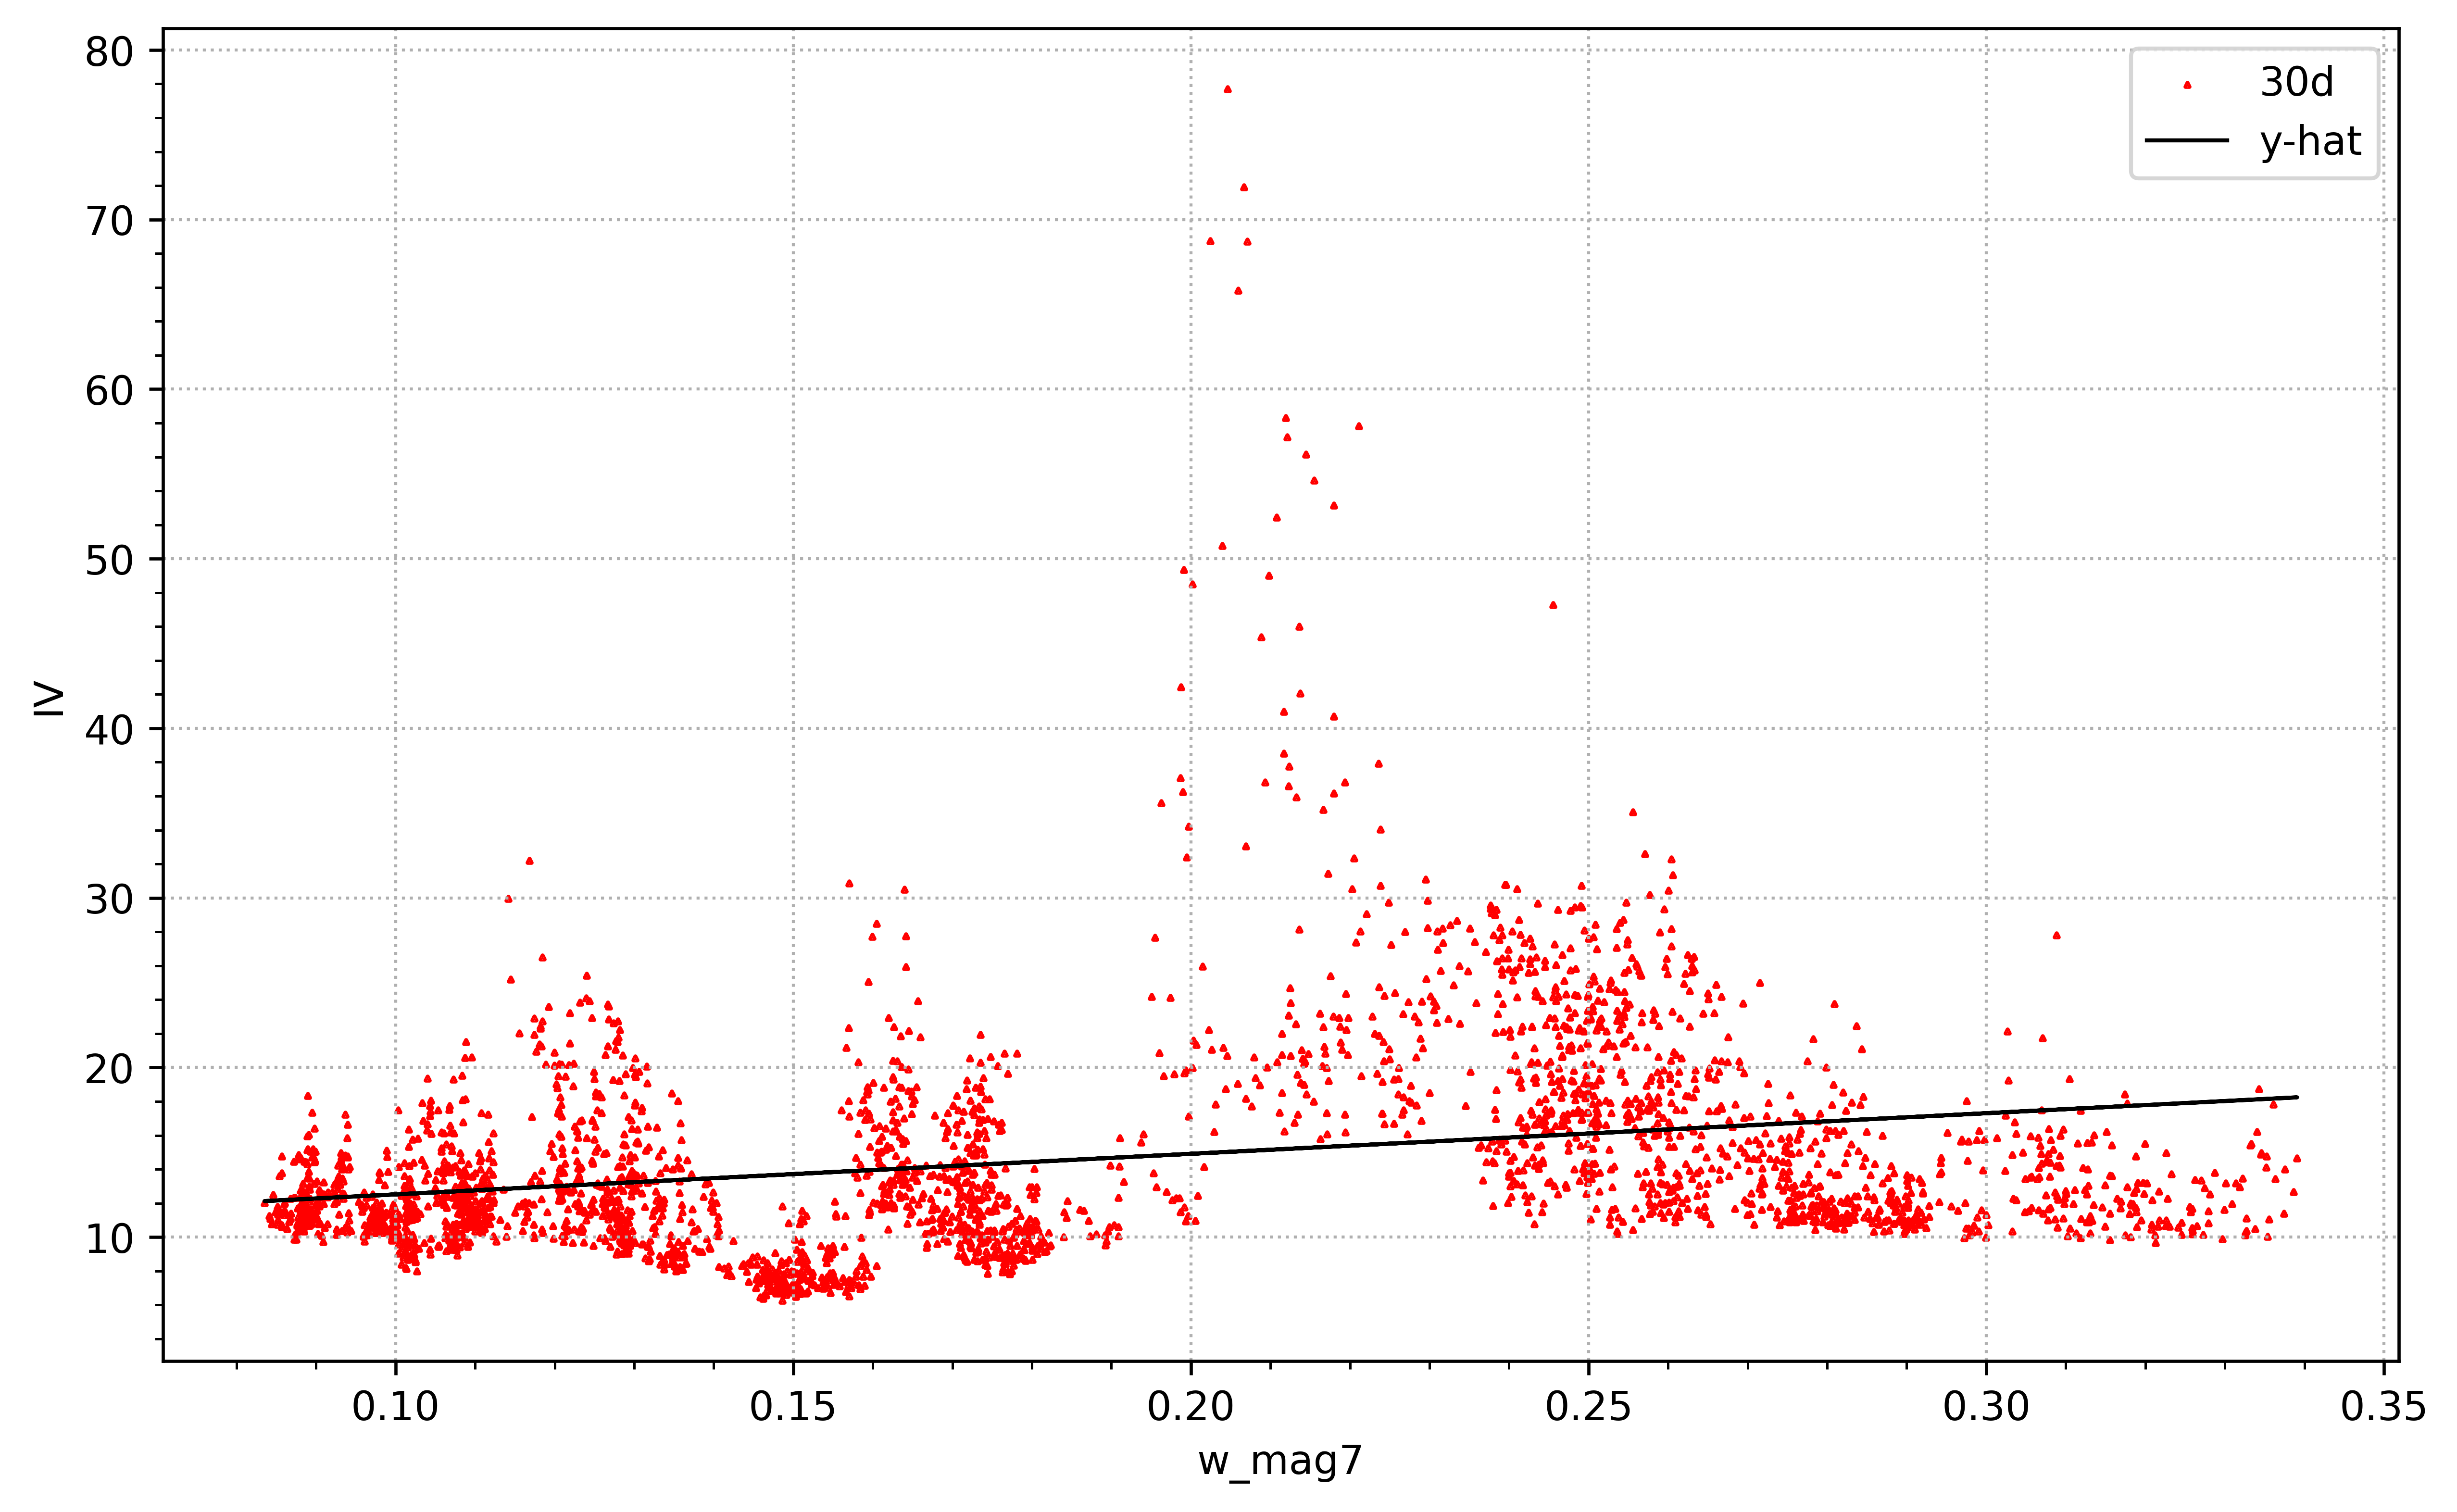

In [14]:
y_pred = results.predict(X)

plt.figure(figsize=(10, 6), dpi=600)
plt.scatter(data_30['w_mag7'], data_30['30 day'],
            color='red', marker='^', s=1, label='30d')
plt.plot(data_30['w_mag7'], y_pred,
         color='black', linewidth=1, label='y-hat')

plt.xlabel('w_mag7')
plt.ylabel('IV')
plt.legend()
plt.grid(True, linestyle=':', linewidth=0.75)
plt.minorticks_on()
plt.show()

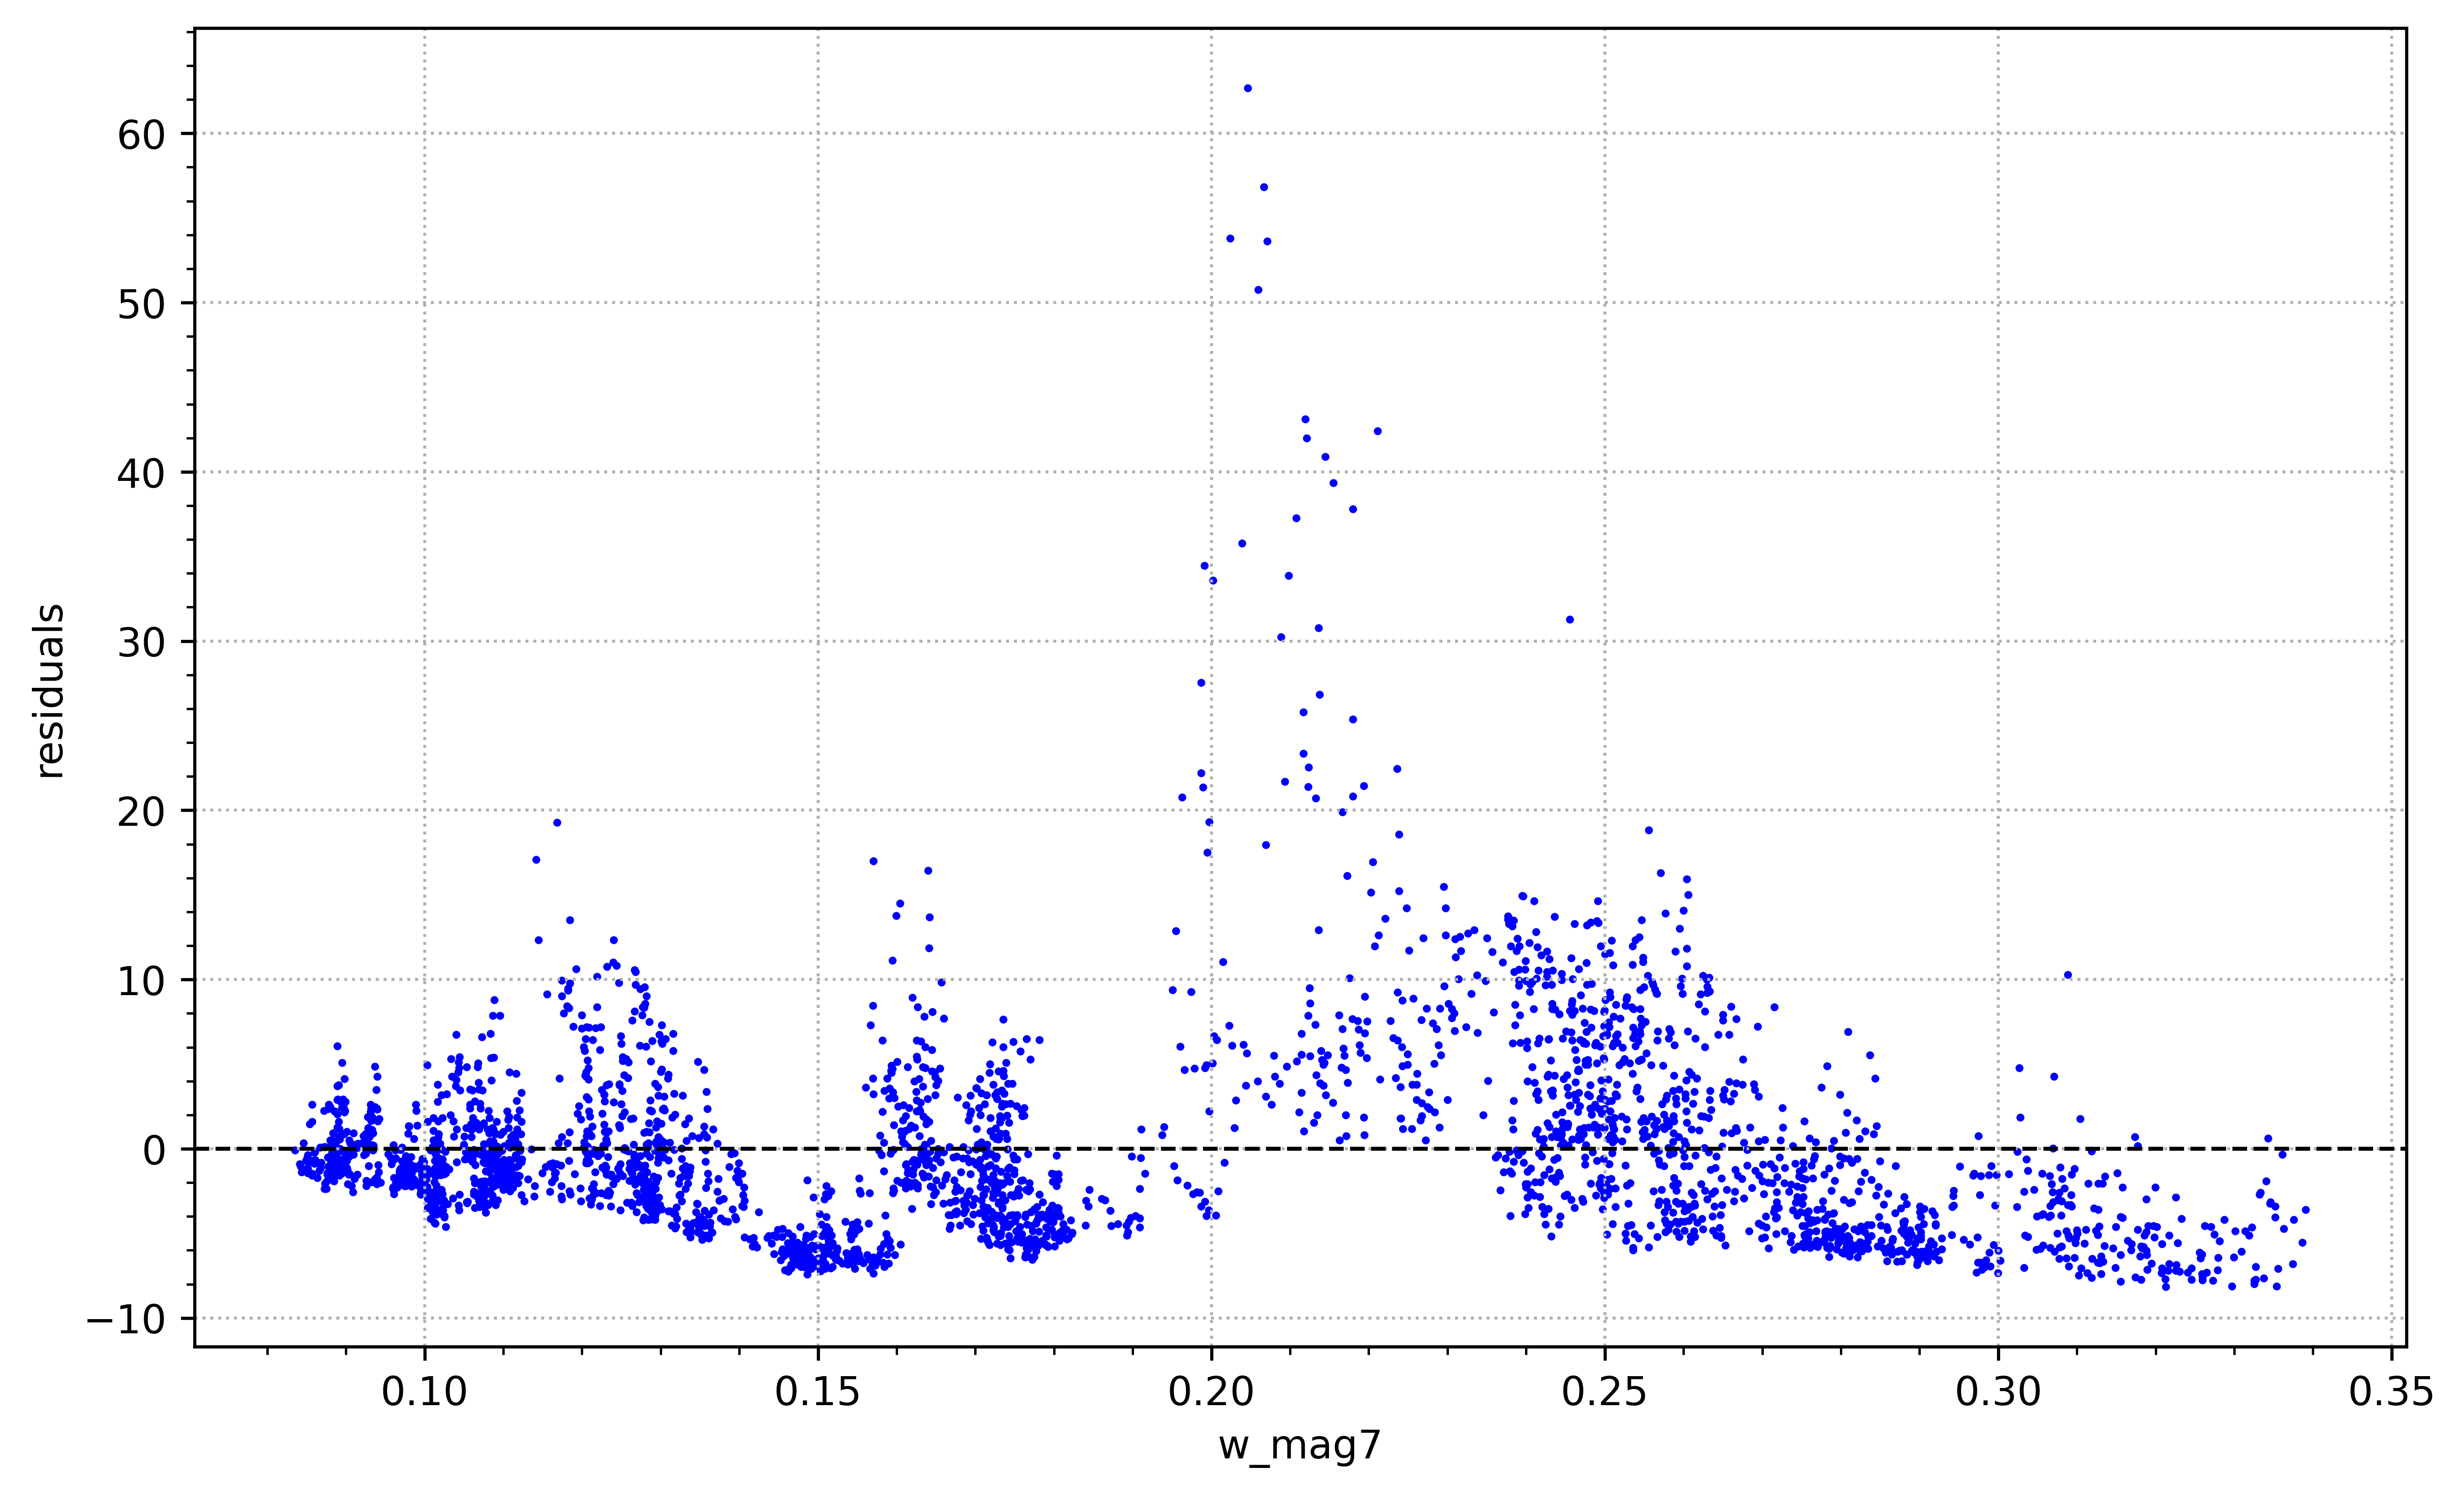

In [15]:
residuals = results.resid

plt.figure(figsize=(10, 6), dpi=600)
plt.scatter(data_30['w_mag7'], residuals,
            color='blue', marker='o', s=1)
plt.axhline(0, color='black', linestyle='--', linewidth=1)

plt.xlabel('w_mag7')
plt.ylabel('residuals')
plt.grid(True, linestyle=':', linewidth=0.75)
plt.minorticks_on()
plt.show()

In [16]:
X = data1.iloc[:,:7]
X = sm.add_constant(X)
y = data_30['30 day']

model = sm.OLS(y, X)
results = model.fit(cov_type='HC3')

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 30 day   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     216.2
Date:                Thu, 27 Feb 2025   Prob (F-statistic):          2.88e-261
Time:                        14:50:01   Log-Likelihood:                -9348.7
No. Observations:                3050   AIC:                         1.871e+04
Df Residuals:                    3042   BIC:                         1.876e+04
Df Model:                           7                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              11.7200      0.915     

In [17]:
log_y = np.log(data_30['30 day'])

X_sum = sm.add_constant(data_c['w_mag7'])

model_sum = sm.OLS(log_y, X_sum)
results_sum = model_sum.fit(cov_type='HC3')
print(results_sum.summary())

                            OLS Regression Results                            
Dep. Variable:                 30 day   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     465.6
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           3.17e-96
Time:                        14:50:01   Log-Likelihood:                -966.02
No. Observations:                3050   AIC:                             1936.
Df Residuals:                    3048   BIC:                             1948.
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3230      0.013    175.921      0.0

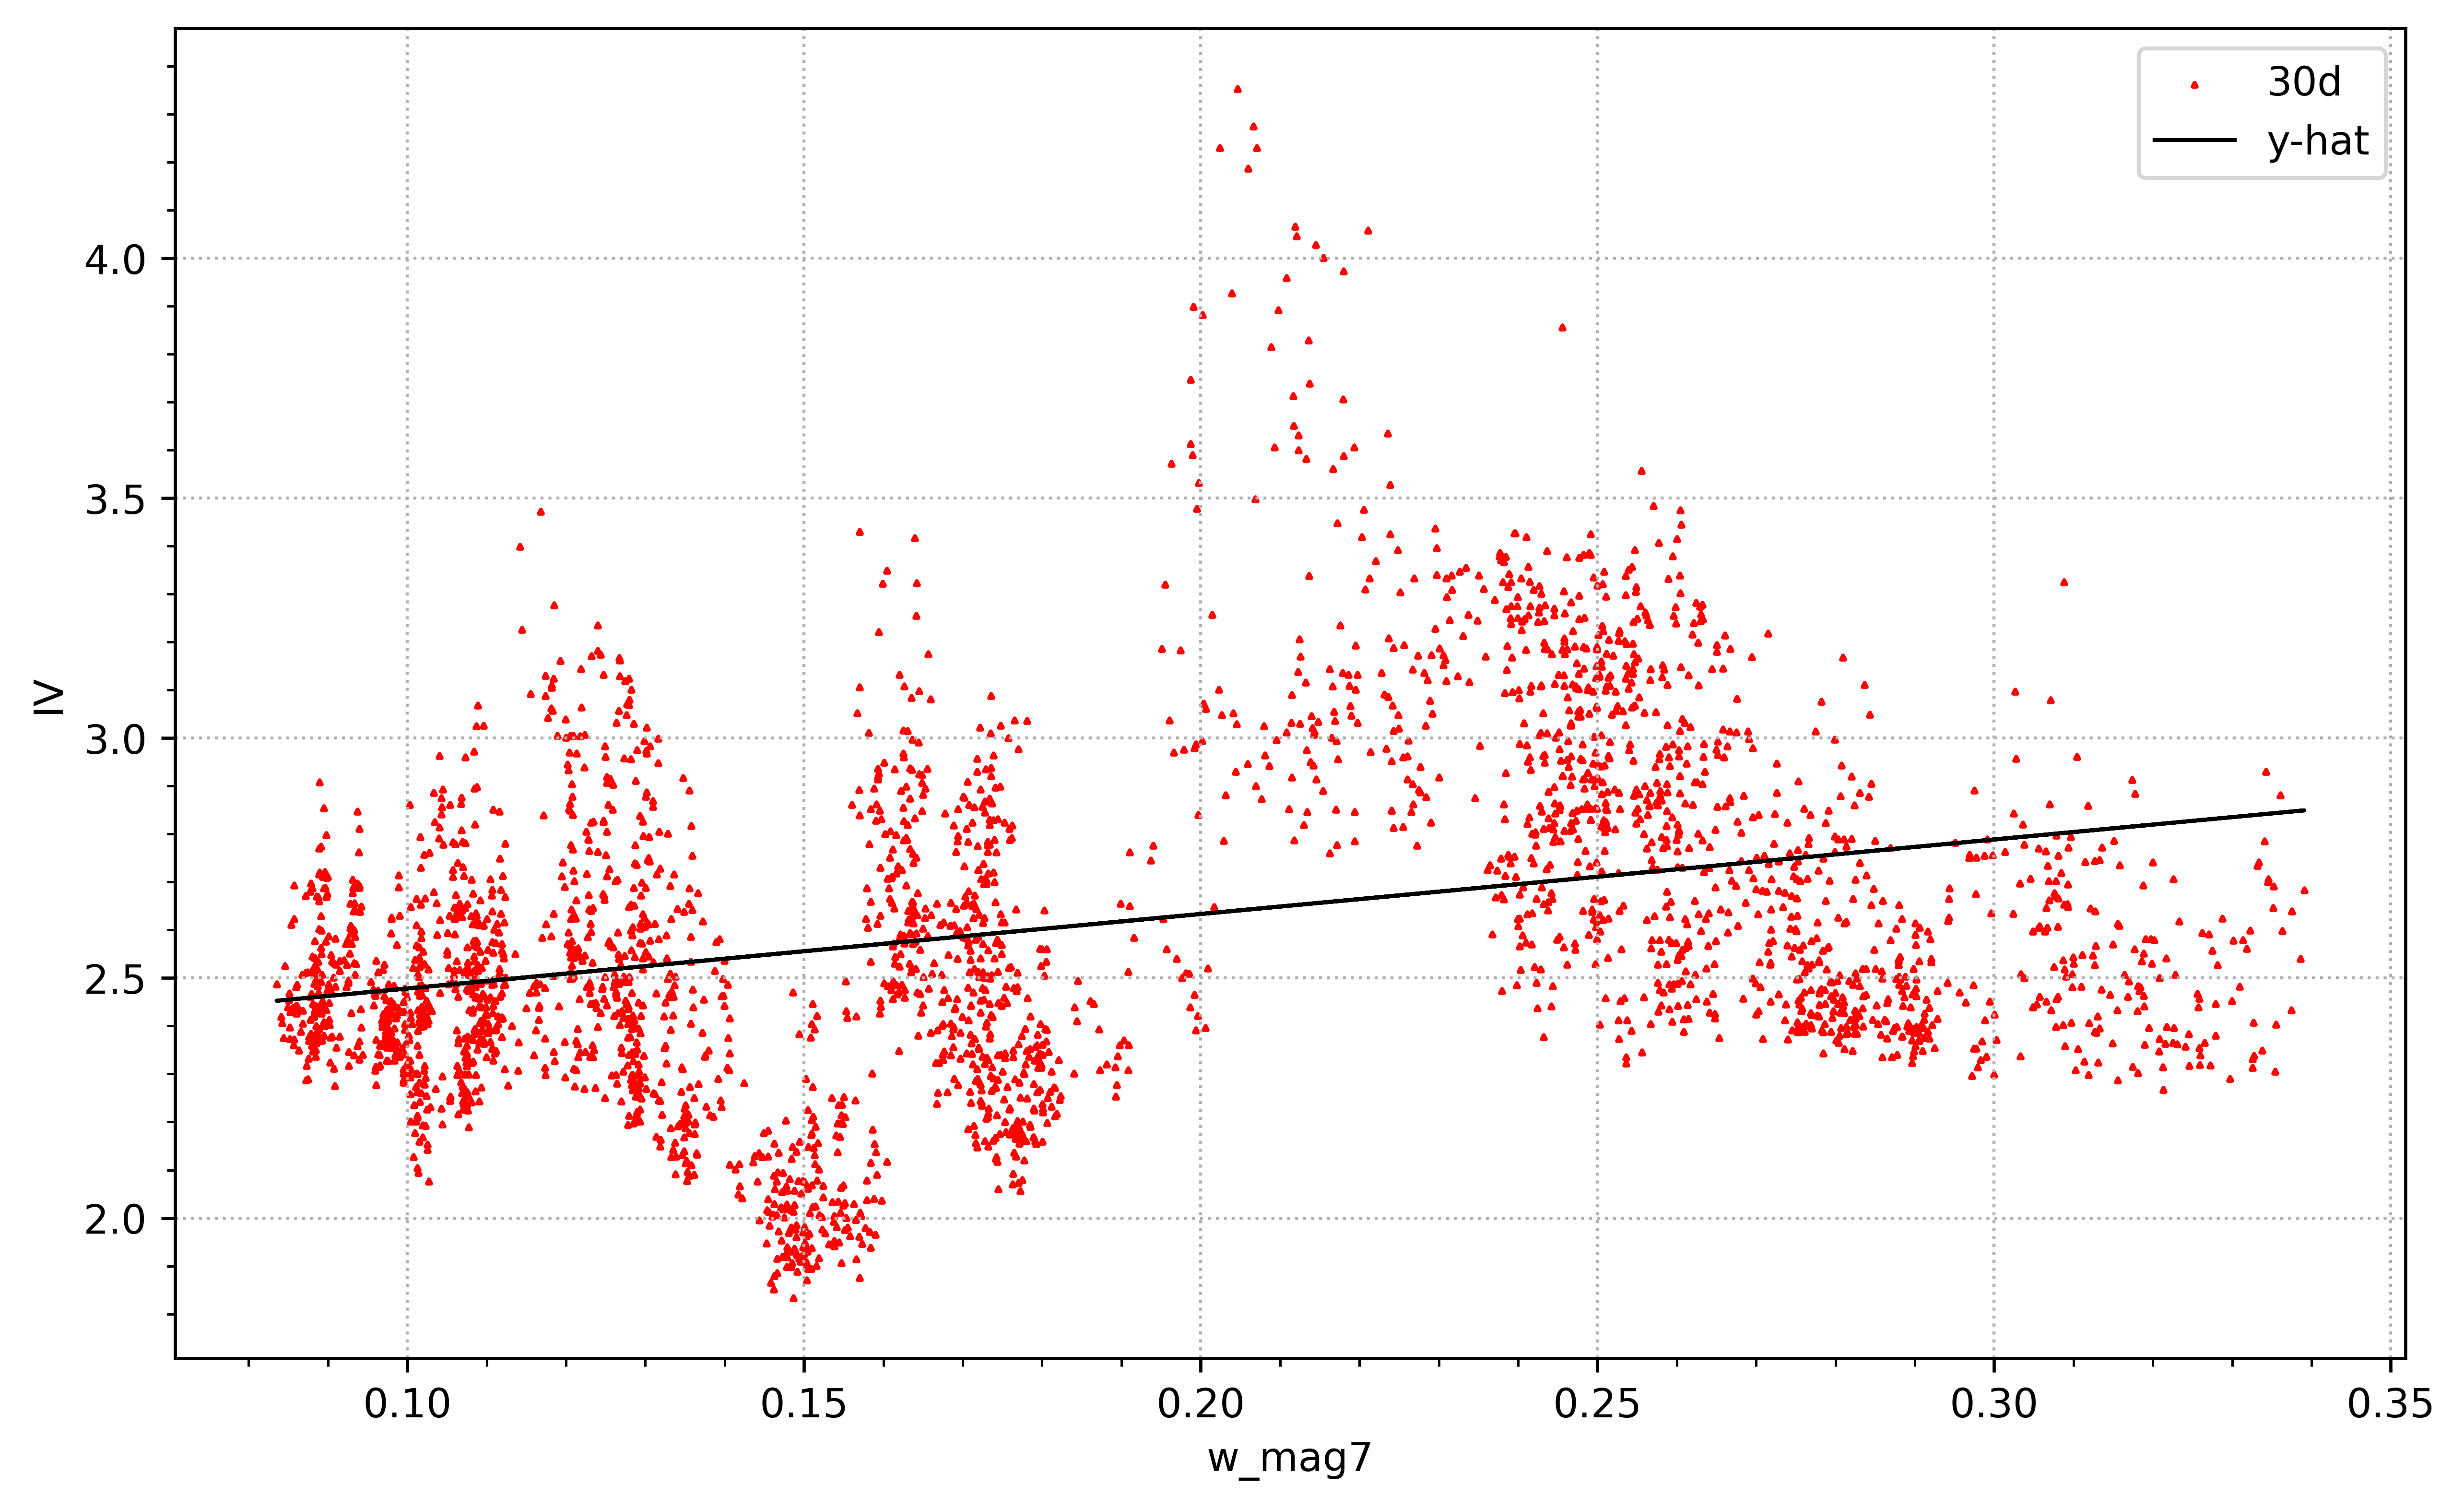

In [18]:
y_pred = results_sum.predict(X_sum)

plt.figure(figsize=(10, 6), dpi=600)
plt.scatter(data_30['w_mag7'], log_y,
            color='red', marker='^', s=1, label='30d')
plt.plot(data_30['w_mag7'], y_pred,
         color='black', linewidth=1, label='y-hat')

plt.xlabel('w_mag7')
plt.ylabel('IV')
plt.legend()
plt.grid(True, linestyle=':', linewidth=0.75)
plt.minorticks_on()
plt.show()

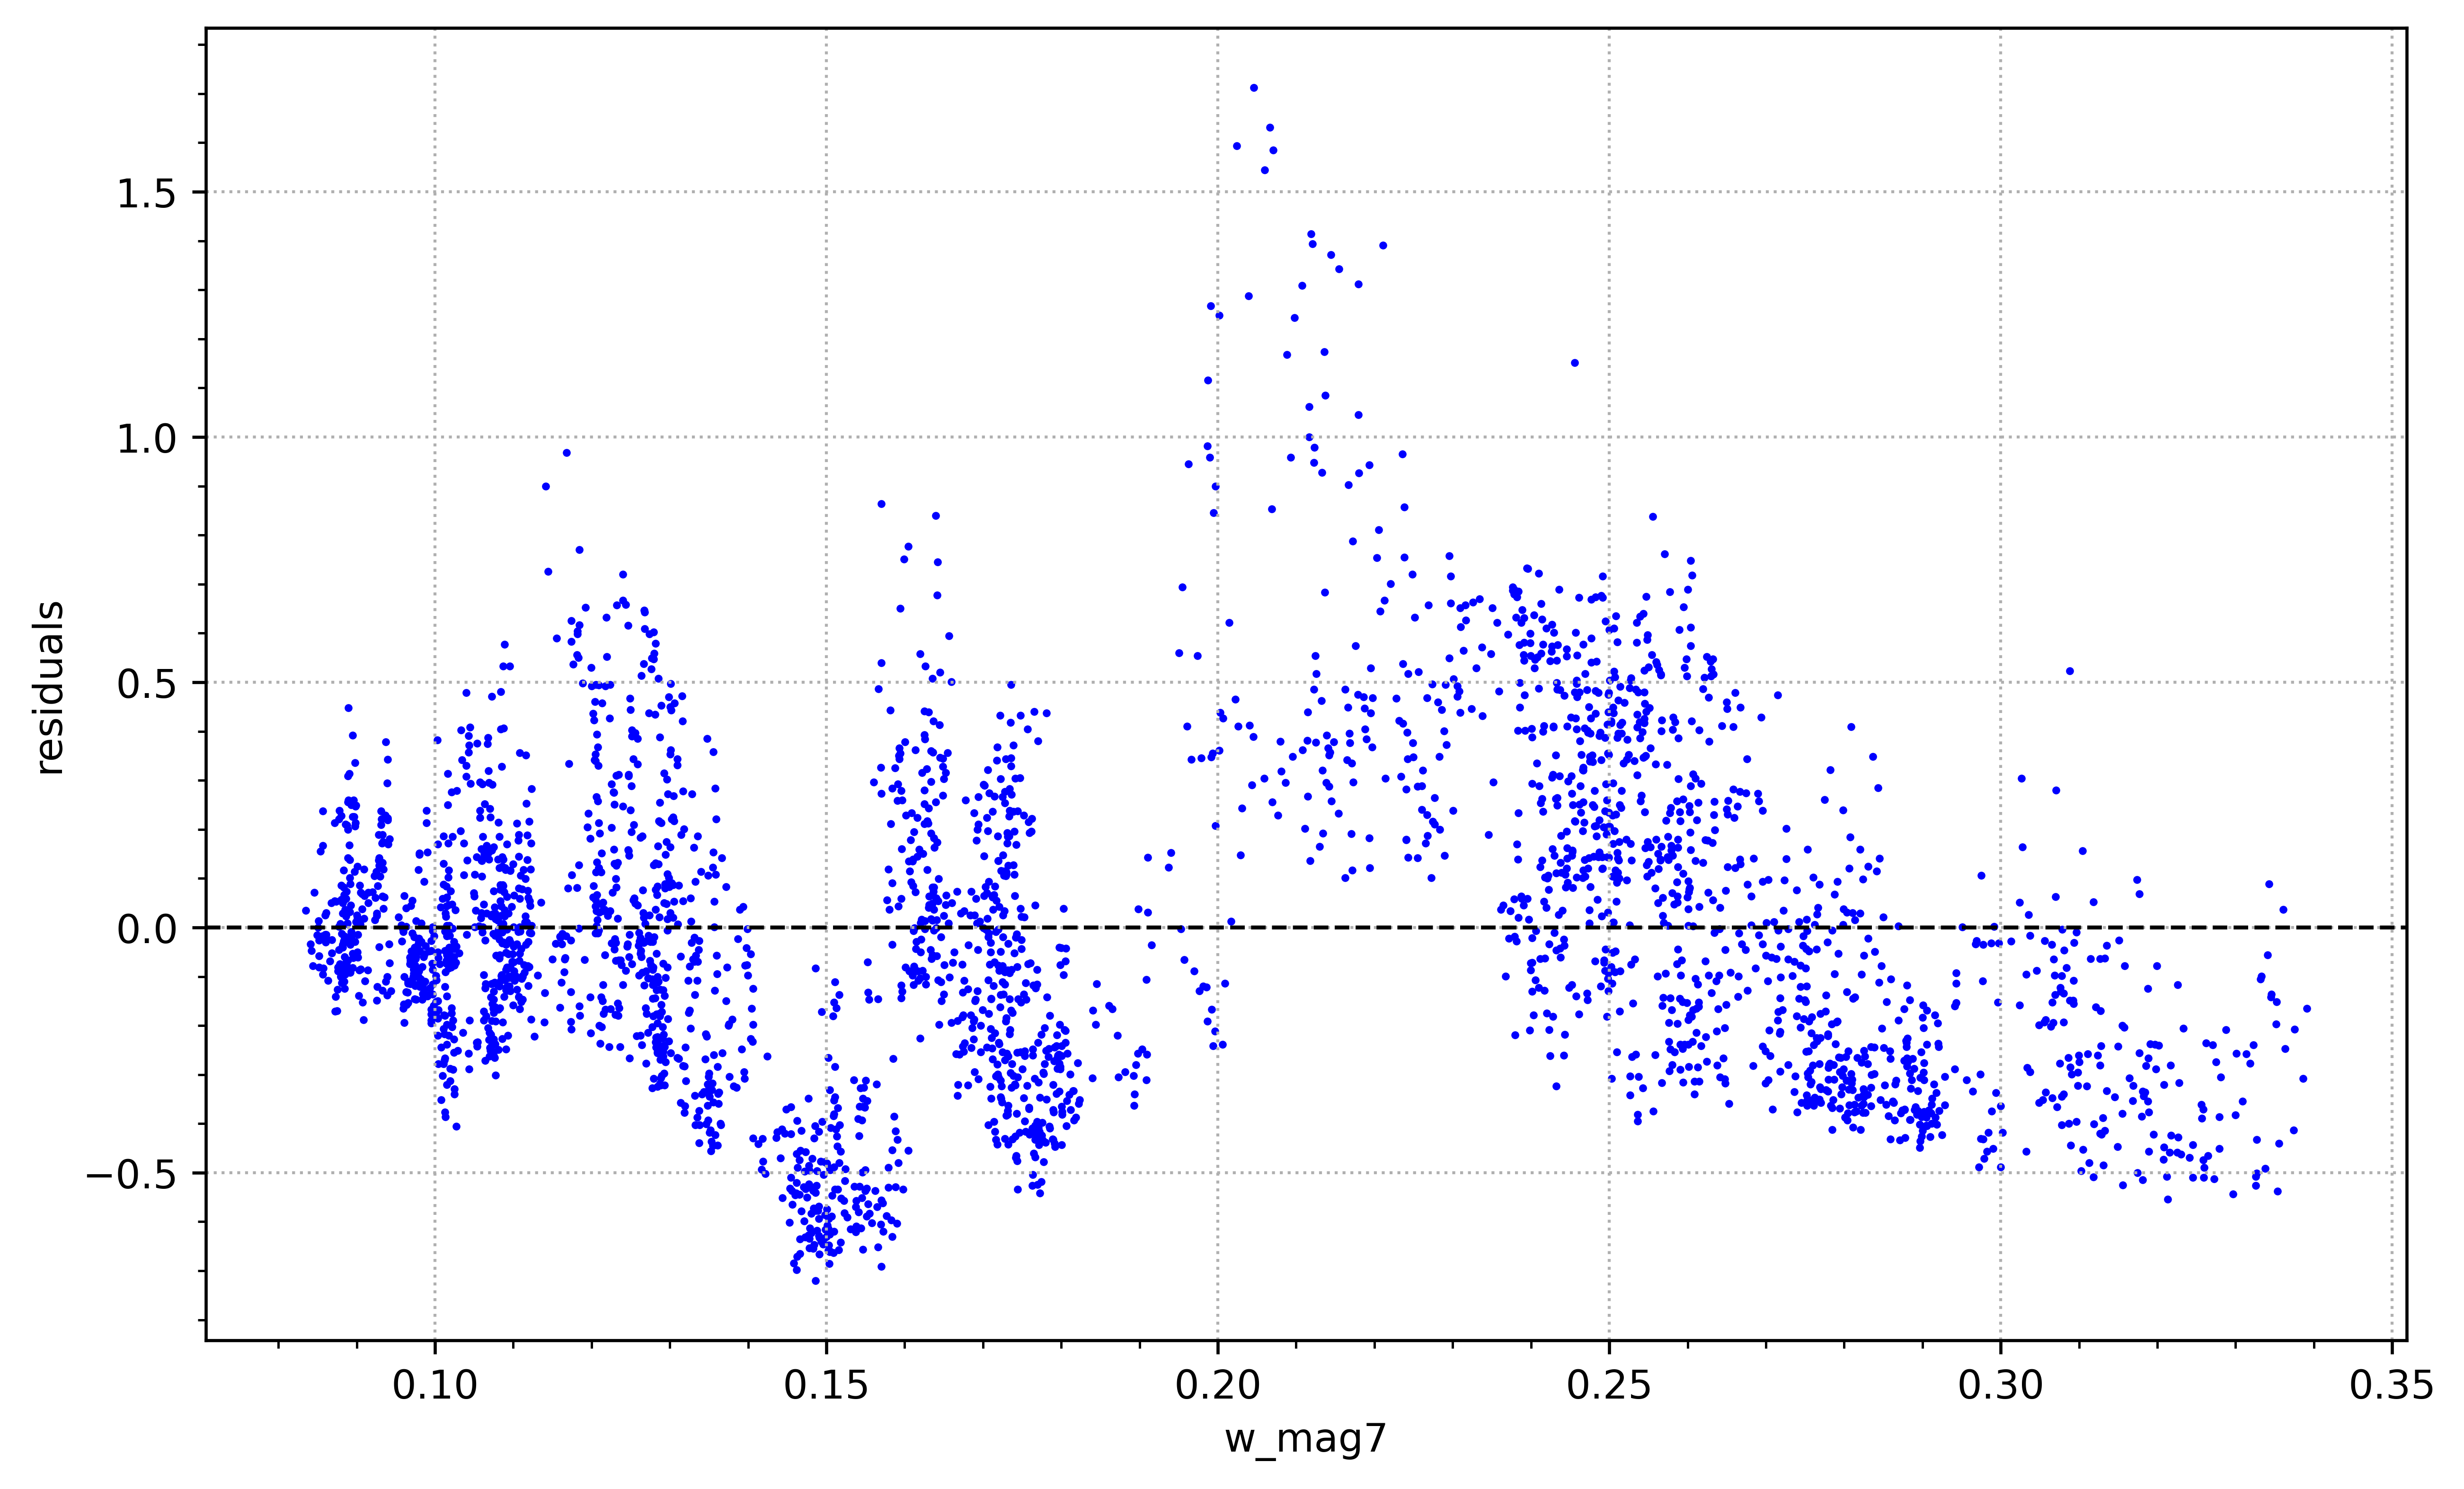

In [19]:
residuals = results_sum.resid

plt.figure(figsize=(10, 6), dpi=600)
plt.scatter(data_30['w_mag7'], residuals,
            color='blue', marker='o', s=1)
plt.axhline(0, color='black', linestyle='--', linewidth=1)

plt.xlabel('w_mag7')
plt.ylabel('residuals')
plt.grid(True, linestyle=':', linewidth=0.75)
plt.minorticks_on()
plt.show()

In [20]:
X = data1.iloc[:, :7]
X = sm.add_constant(X)

model = sm.OLS(log_y, X)
results = model.fit(cov_type='HC3')

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 30 day   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     300.7
Date:                Thu, 27 Feb 2025   Prob (F-statistic):               0.00
Time:                        14:50:04   Log-Likelihood:                -390.69
No. Observations:                3050   AIC:                             797.4
Df Residuals:                    3042   BIC:                             845.6
Df Model:                           7                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.6397      0.051     

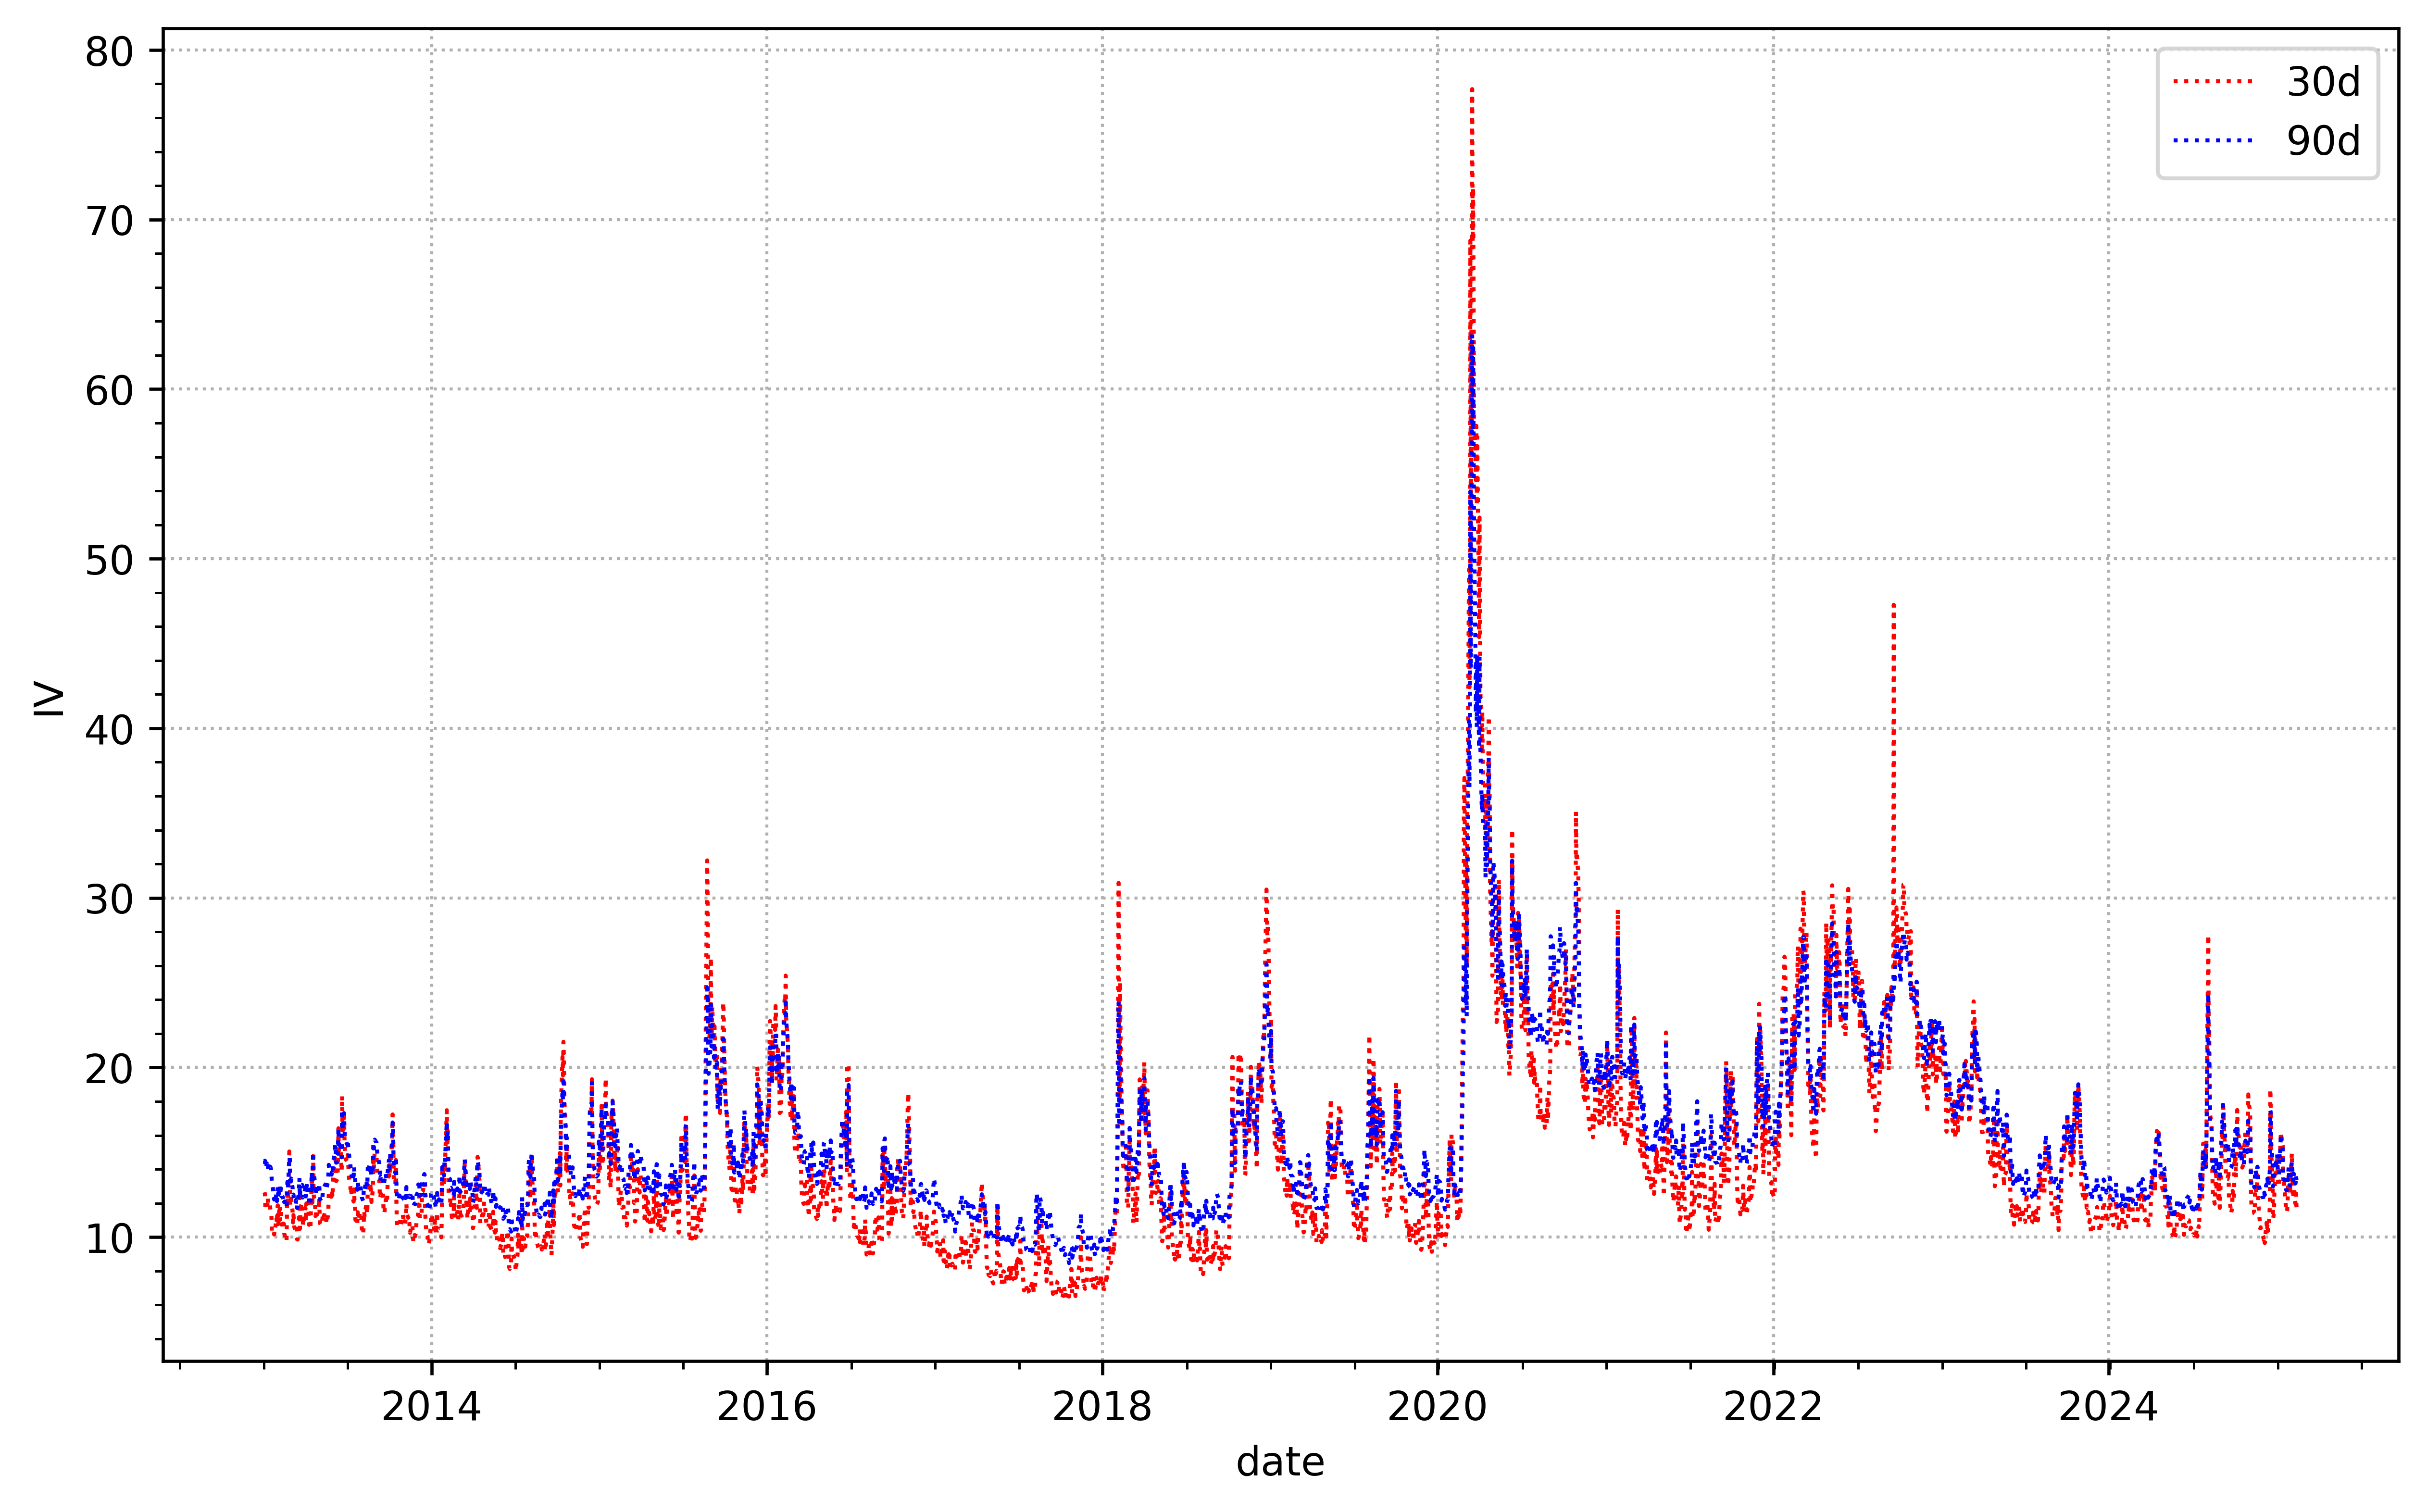

In [21]:
plt.figure(figsize=(10, 6), dpi=600)
plt.plot(data_30.index, data_30['30 day'], color='red', label='30d', ls=':', linewidth=1)
plt.plot(data_90.index, data_90['90 day'], color='blue', label='90d', ls=':', linewidth=1)
plt.xlabel('date')
plt.ylabel('IV')
plt.legend()
plt.grid(True, linestyle=':', linewidth=0.75)
plt.minorticks_on()
plt.show()

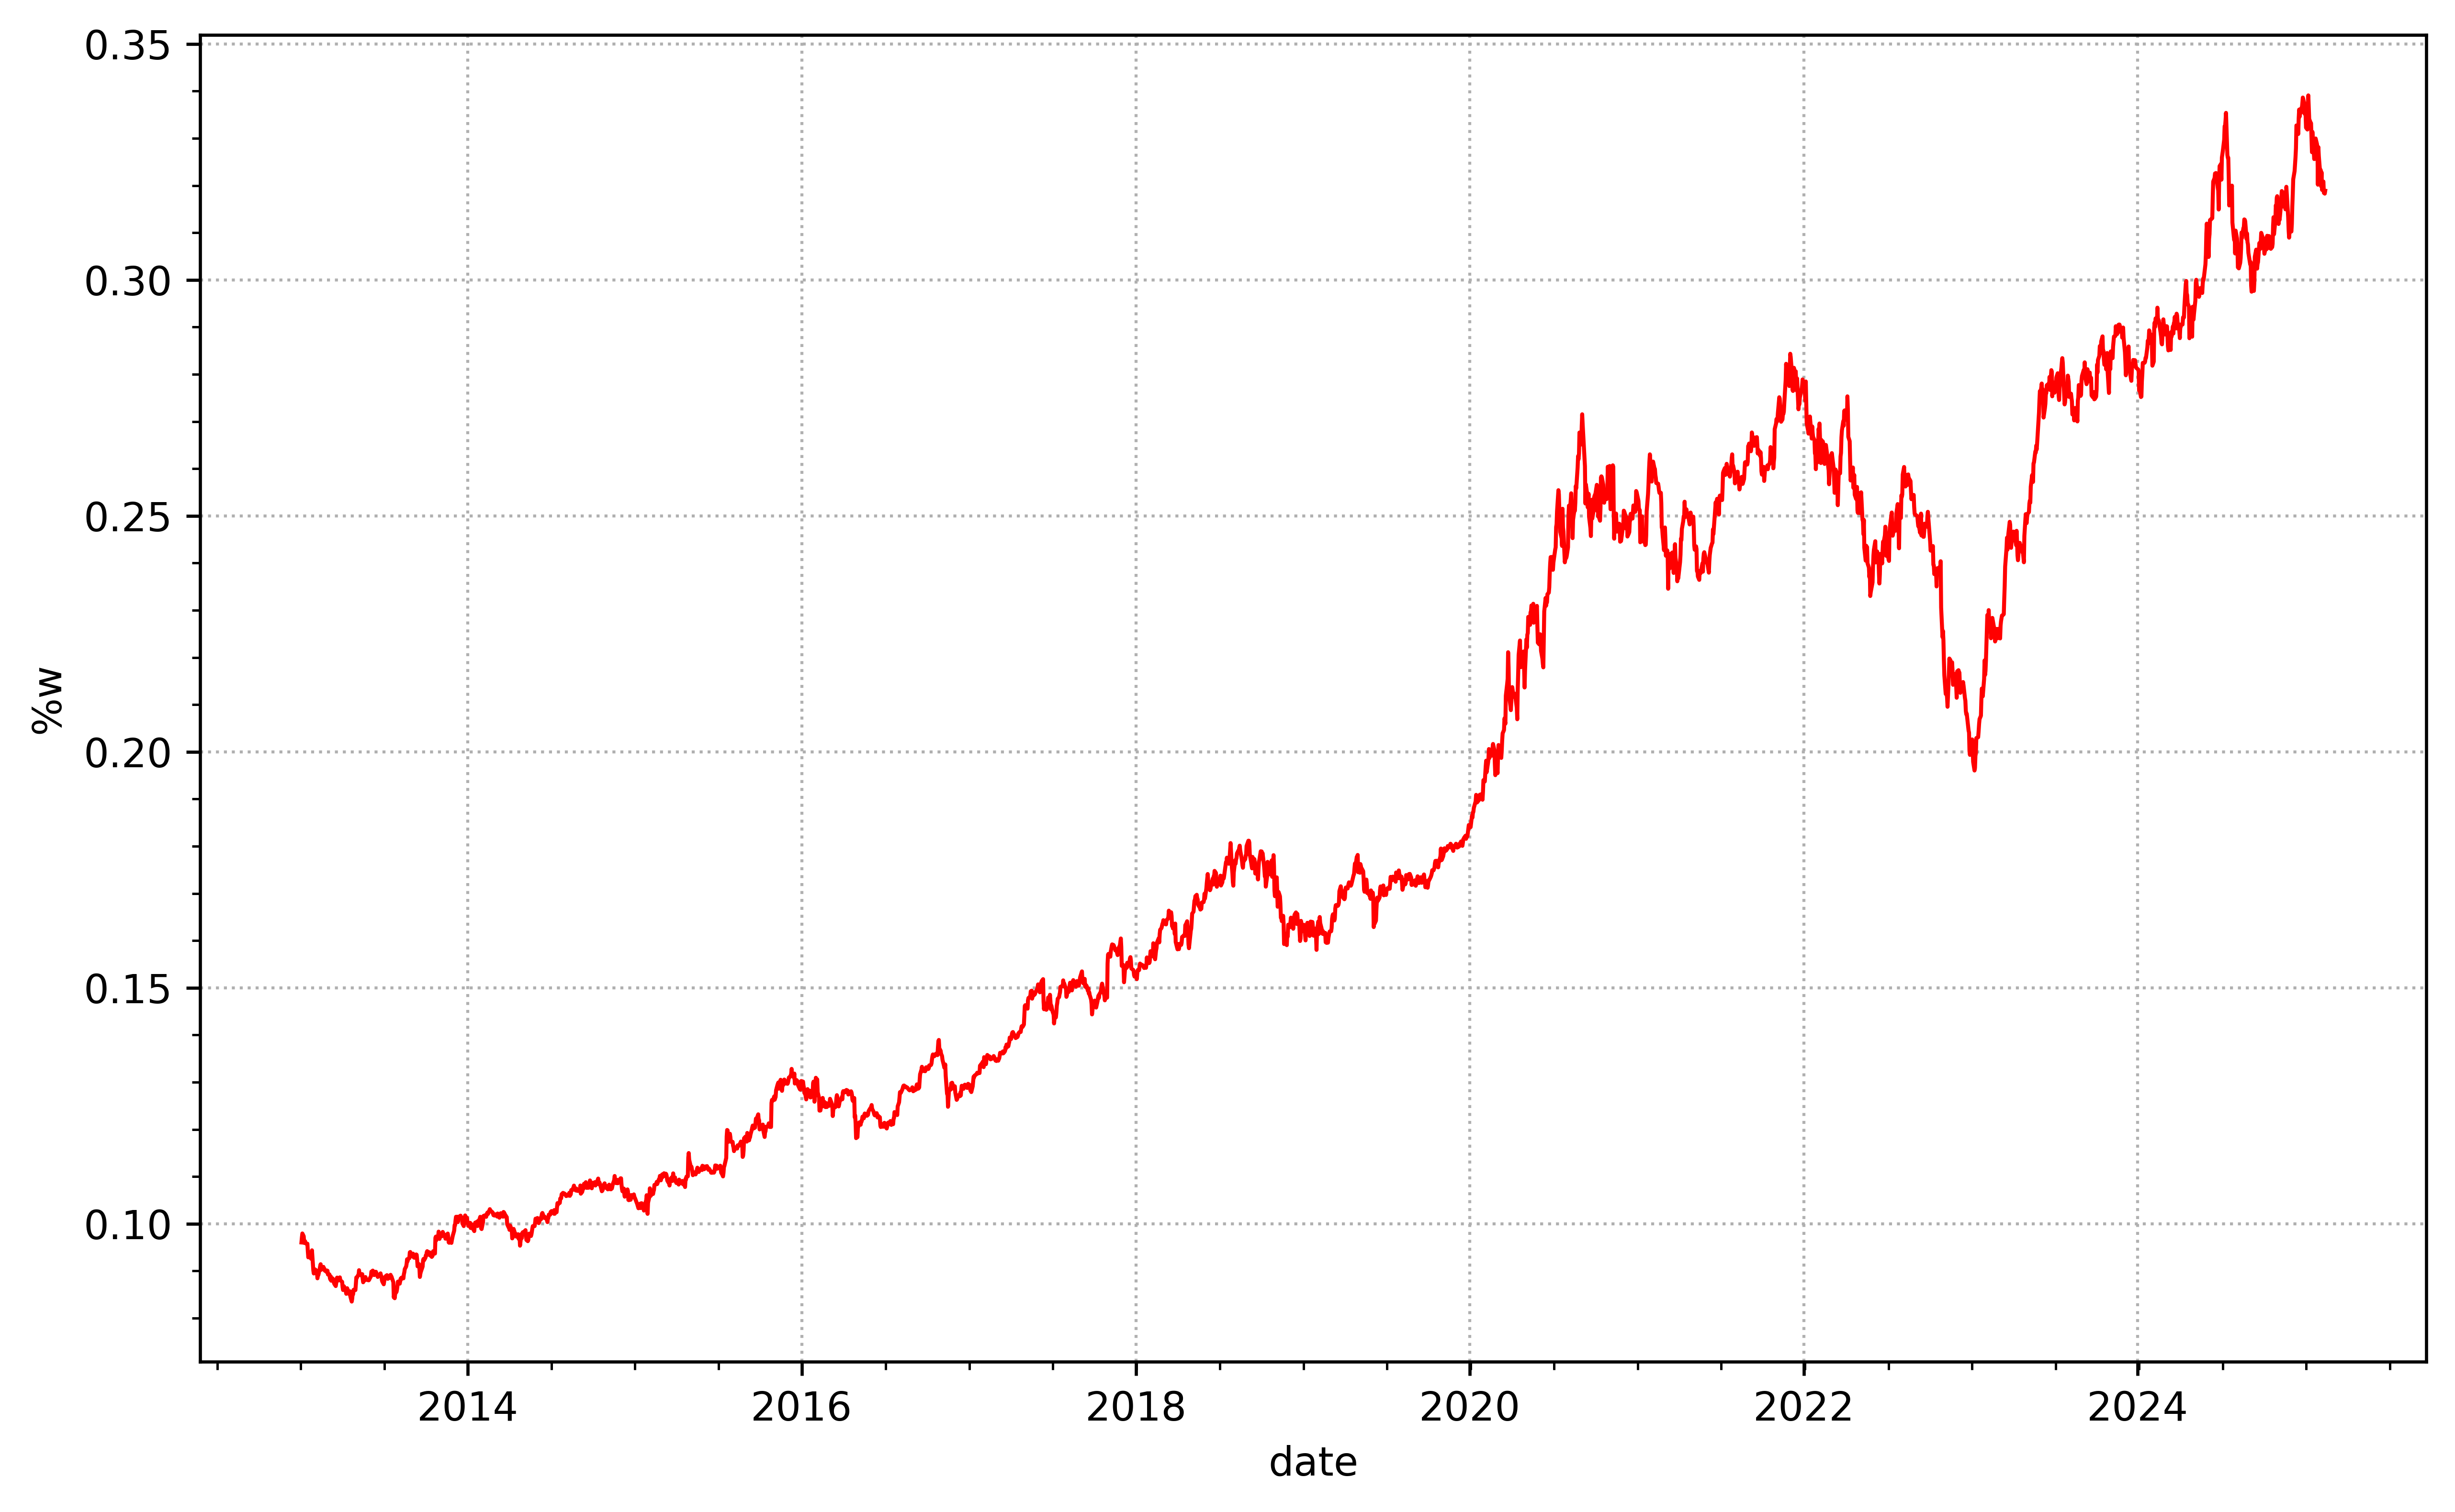

In [22]:
plt.figure(figsize=(10, 6), dpi=600)
plt.plot(data_30.index, data_30['w_mag7'], color='red', linewidth=1)

plt.xlabel('date')
plt.ylabel('%w')
plt.grid(True, linestyle=':', linewidth=0.75)
plt.minorticks_on()
plt.show()

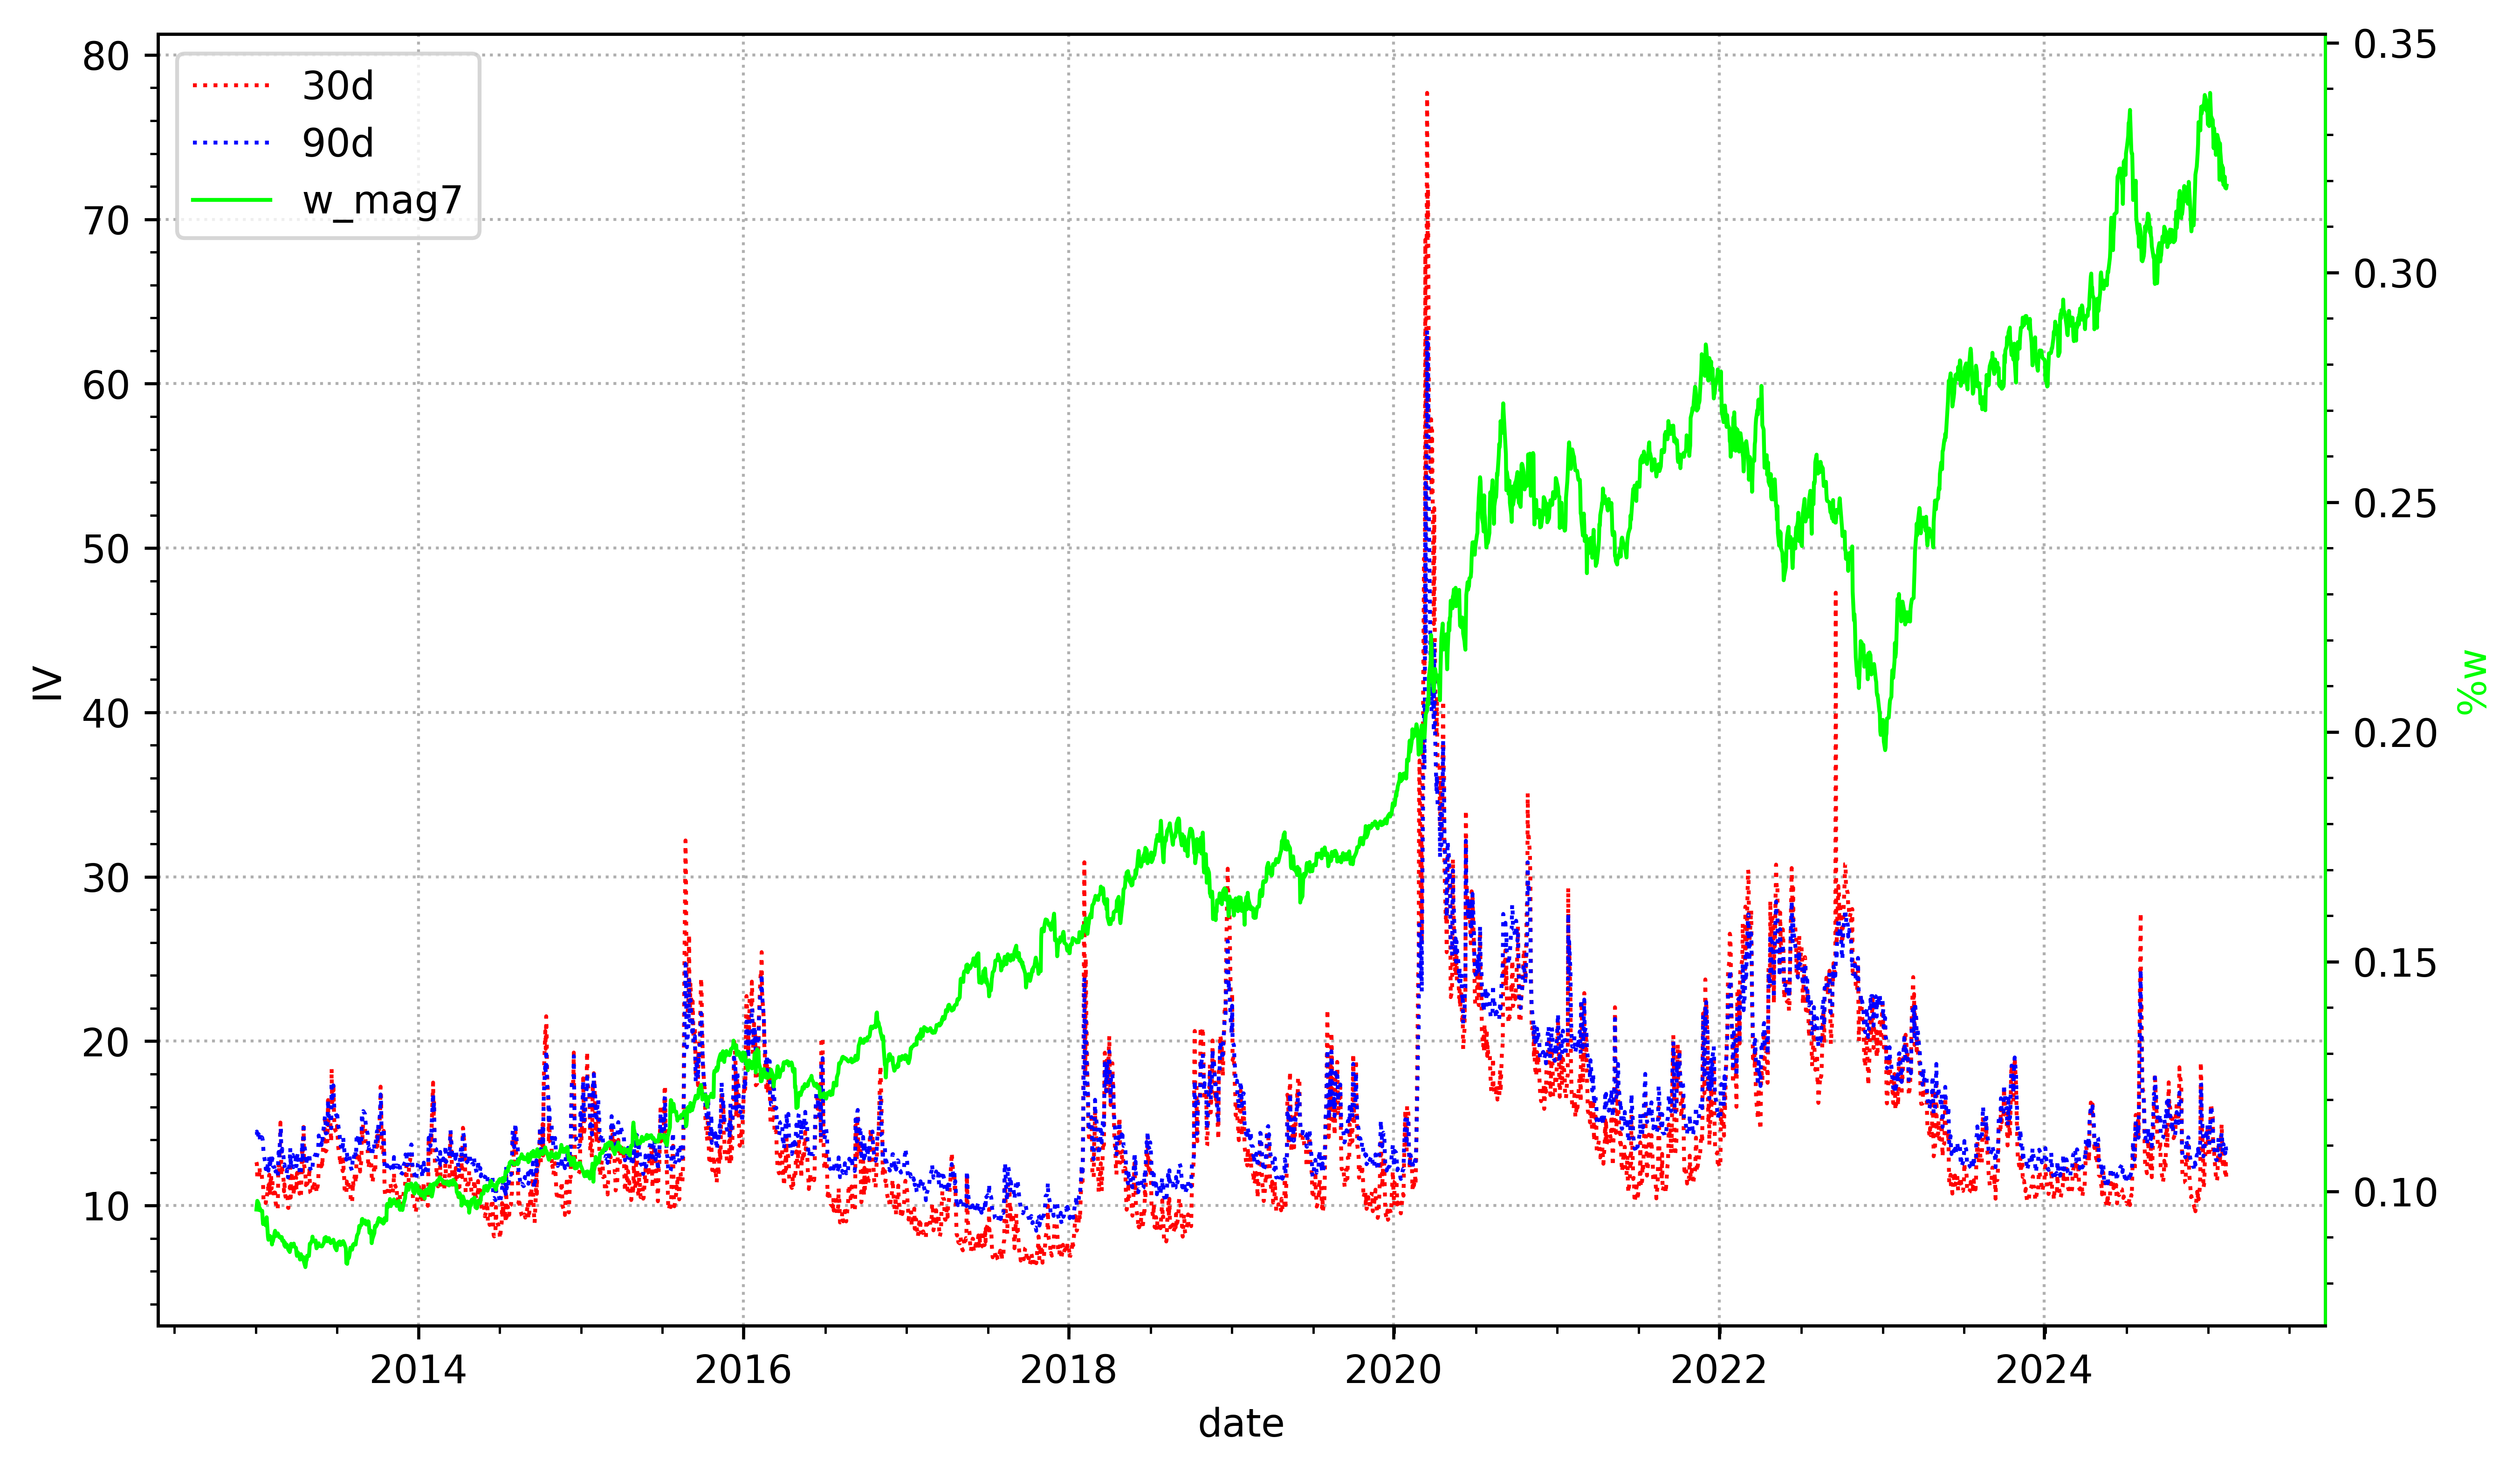

In [23]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 6), dpi=600)

ax1.plot(data_30.index, data_30['30 day'],
         color='red', label='30d', ls=':', linewidth=1)
ax1.plot(data_90.index, data_90['90 day'],
         color='blue', label='90d', ls=':', linewidth=1)

ax1.set_xlabel('date')
ax1.set_ylabel('IV')
ax1.grid(True, linestyle=':', linewidth=0.75)
ax1.minorticks_on()

#ax1.legend(loc='upper left')
ax2 = ax1.twinx()

ax2.plot(data_30.index, data_30['w_mag7'],
         color='lime', linewidth=1, label='w_mag7')

ax2.set_ylabel('%w')
ax2.minorticks_on()

ax2.spines['right'].set_color('lime')
#ax2.tick_params(axis='y', colors='lime')
ax2.yaxis.label.set_color('lime')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.show()


In [24]:
data_30['w_mag7_%'] = data_30['w_mag7'].pct_change()
data_90['w_mag7_%'] = data_90['w_mag7'].pct_change()

#max_lag = 10
#for i in range(1, max_lag + 1):
    #data_30[f'w_mag7_% lag{i}'] = data_30['w_mag7_%'].shift(i)
    #data_90[f'w_mag7_% lag{i}'] = data_90['w_mag7_%'].shift(i)

data_30.dropna(inplace=True)
data_90.dropna(inplace=True)
data_30

30 day    w_mag7    w_rest  w_mag7_%
date                                             
2013-01-03  12.5386  0.097115  0.902885  0.011086
2013-01-04  11.6178  0.097950  0.902050  0.008593
2013-01-07  11.6415  0.097348  0.902652 -0.006150
2013-01-08  11.7402  0.095953  0.904047 -0.014322
2013-01-09  12.3339  0.096307  0.903693  0.003687
...             ...       ...       ...       ...
2025-02-10  12.1883  0.320839  0.679161  0.005554
2025-02-11  11.9594  0.318442  0.681558 -0.007471
2025-02-12  12.8288  0.318839  0.681161  0.001249
2025-02-13  11.8625  0.318277  0.681723 -0.001765
2025-02-14  11.4887  0.318888  0.681112  0.001920

[3049 rows x 4 columns]

In [25]:
import pandas as pd
import yfinance as yf

spx_data = yf.download("^GSPC", start="2013-01-02", end="2025-02-15", progress=False)

spx_data['return'] = spx_data['Close'].pct_change()
spx_data['return^2'] = spx_data['return']**2
spx_data.columns = spx_data.columns.droplevel(level=-1)
new_cols = [col for col in spx_data.columns]
spx_data.columns = pd.MultiIndex.from_arrays([new_cols, new_cols])
spx_data.columns = spx_data.columns.droplevel(level=0)
spx_data.dropna(inplace=True)

spx_data = spx_data.drop(columns=['Close', 'High', 'Low', 'Open', 'Volume'])
spx_data.index.rename("date", inplace=True)
spx_data


YF.download() has changed argument auto_adjust default to True


return      return^2
date                              
2013-01-03 -0.002086  4.349800e-06
2013-01-04  0.004865  2.366916e-05
2013-01-07 -0.003123  9.753855e-06
2013-01-08 -0.003242  1.051297e-05
2013-01-09  0.002656  7.053624e-06
...              ...           ...
2025-02-10  0.006713  4.505821e-05
2025-02-11  0.000340  1.153165e-07
2025-02-12 -0.002724  7.419450e-06
2025-02-13  0.010426  1.087076e-04
2025-02-14 -0.000072  5.175911e-09

[3049 rows x 2 columns]

In [26]:
def exp_ker(tau):
  return np.exp(-tau)

In [27]:
def R_i(r):
    T = len(r)
    R = np.zeros(T)
    for t in range(T):
        tau = np.arange(t, -1, -1)
        weights = exp_ker(tau)
        R[t] = np.dot(weights, r[:t+1])
    return R

In [28]:
spx_data['R_1'] = R_i(spx_data['return'].values)
spx_data['Sigma'] = np.sqrt(R_i(spx_data['return^2'].values))
spx_data

return      return^2       R_1     Sigma
date                                                  
2013-01-03 -0.002086  4.349800e-06 -0.002086  0.002086
2013-01-04  0.004865  2.366916e-05  0.004098  0.005027
2013-01-07 -0.003123  9.753855e-06 -0.001616  0.004365
2013-01-08 -0.003242  1.051297e-05 -0.003837  0.004186
2013-01-09  0.002656  7.053624e-06  0.001244  0.003674
...              ...           ...       ...       ...
2025-02-10  0.006713  4.505821e-05  0.003991  0.009057
2025-02-11  0.000340  1.153165e-07  0.001808  0.005504
2025-02-12 -0.002724  7.419450e-06 -0.002059  0.004309
2025-02-13  0.010426  1.087076e-04  0.009669  0.010749
2025-02-14 -0.000072  5.175911e-09  0.003485  0.006520

[3049 rows x 4 columns]

In [29]:
data_30r = pd.concat([data_30, spx_data], axis = 1)
data_30r['R_3'] = R_i(data_30['w_mag7_%'].values)
data_30r

30 day    w_mag7    w_rest  w_mag7_%    return      return^2  \
date                                                                        
2013-01-03  12.5386  0.097115  0.902885  0.011086 -0.002086  4.349800e-06   
2013-01-04  11.6178  0.097950  0.902050  0.008593  0.004865  2.366916e-05   
2013-01-07  11.6415  0.097348  0.902652 -0.006150 -0.003123  9.753855e-06   
2013-01-08  11.7402  0.095953  0.904047 -0.014322 -0.003242  1.051297e-05   
2013-01-09  12.3339  0.096307  0.903693  0.003687  0.002656  7.053624e-06   
...             ...       ...       ...       ...       ...           ...   
2025-02-10  12.1883  0.320839  0.679161  0.005554  0.006713  4.505821e-05   
2025-02-11  11.9594  0.318442  0.681558 -0.007471  0.000340  1.153165e-07   
2025-02-12  12.8288  0.318839  0.681161  0.001249 -0.002724  7.419450e-06   
2025-02-13  11.8625  0.318277  0.681723 -0.001765  0.010426  1.087076e-04   
2025-02-14  11.4887  0.318888  0.681112  0.001920 -0.000072  5.175911e-09   

                 R_1     Sigma       R_3  
date                                      
2013-01-03 -0.002086  0.002086  0.011086  
2013-01-04  0.004098  0.005027  0.012672  
2013-01-07 -0.001616  0.004365 -0.001488  
2013-01-08 -0.003837  0.004186 -0.014870  
2013-01-09  0.001244  0.003674 -0.001784  
...              ...       ...       ...  
2025-02-10  0.003991  0.009057  0.001984  
2025-02-11  0.001808  0.005504 -0.006741  
2025-02-12 -0.002059  0.004309 -0.001231  
2025-02-13  0.009669  0.010749 -0.002218  
2025-02-14  0.003485  0.006520  0.001104  

[3049 rows x 9 columns]

In [36]:
dframe = pd.DataFrame(data_30r, columns=['30 day', 'R_1', 'Sigma', 'R_3'])

X_des = sm.add_constant(dframe[['R_1', 'Sigma', 'R_3']])
y_des = dframe['30 day']

model_r = sm.OLS(y_des, X_des)
results_r = model_r.fit(cov_type='HAC', cov_kwds={'maxlags': 11})

print(results_r.summary())

                            OLS Regression Results                            
Dep. Variable:                 30 day   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     158.5
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           1.95e-95
Time:                        15:01:00   Log-Likelihood:                -8430.1
No. Observations:                3049   AIC:                         1.687e+04
Df Residuals:                    3045   BIC:                         1.689e+04
Df Model:                           3                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.1470      0.299     30.633      0.0

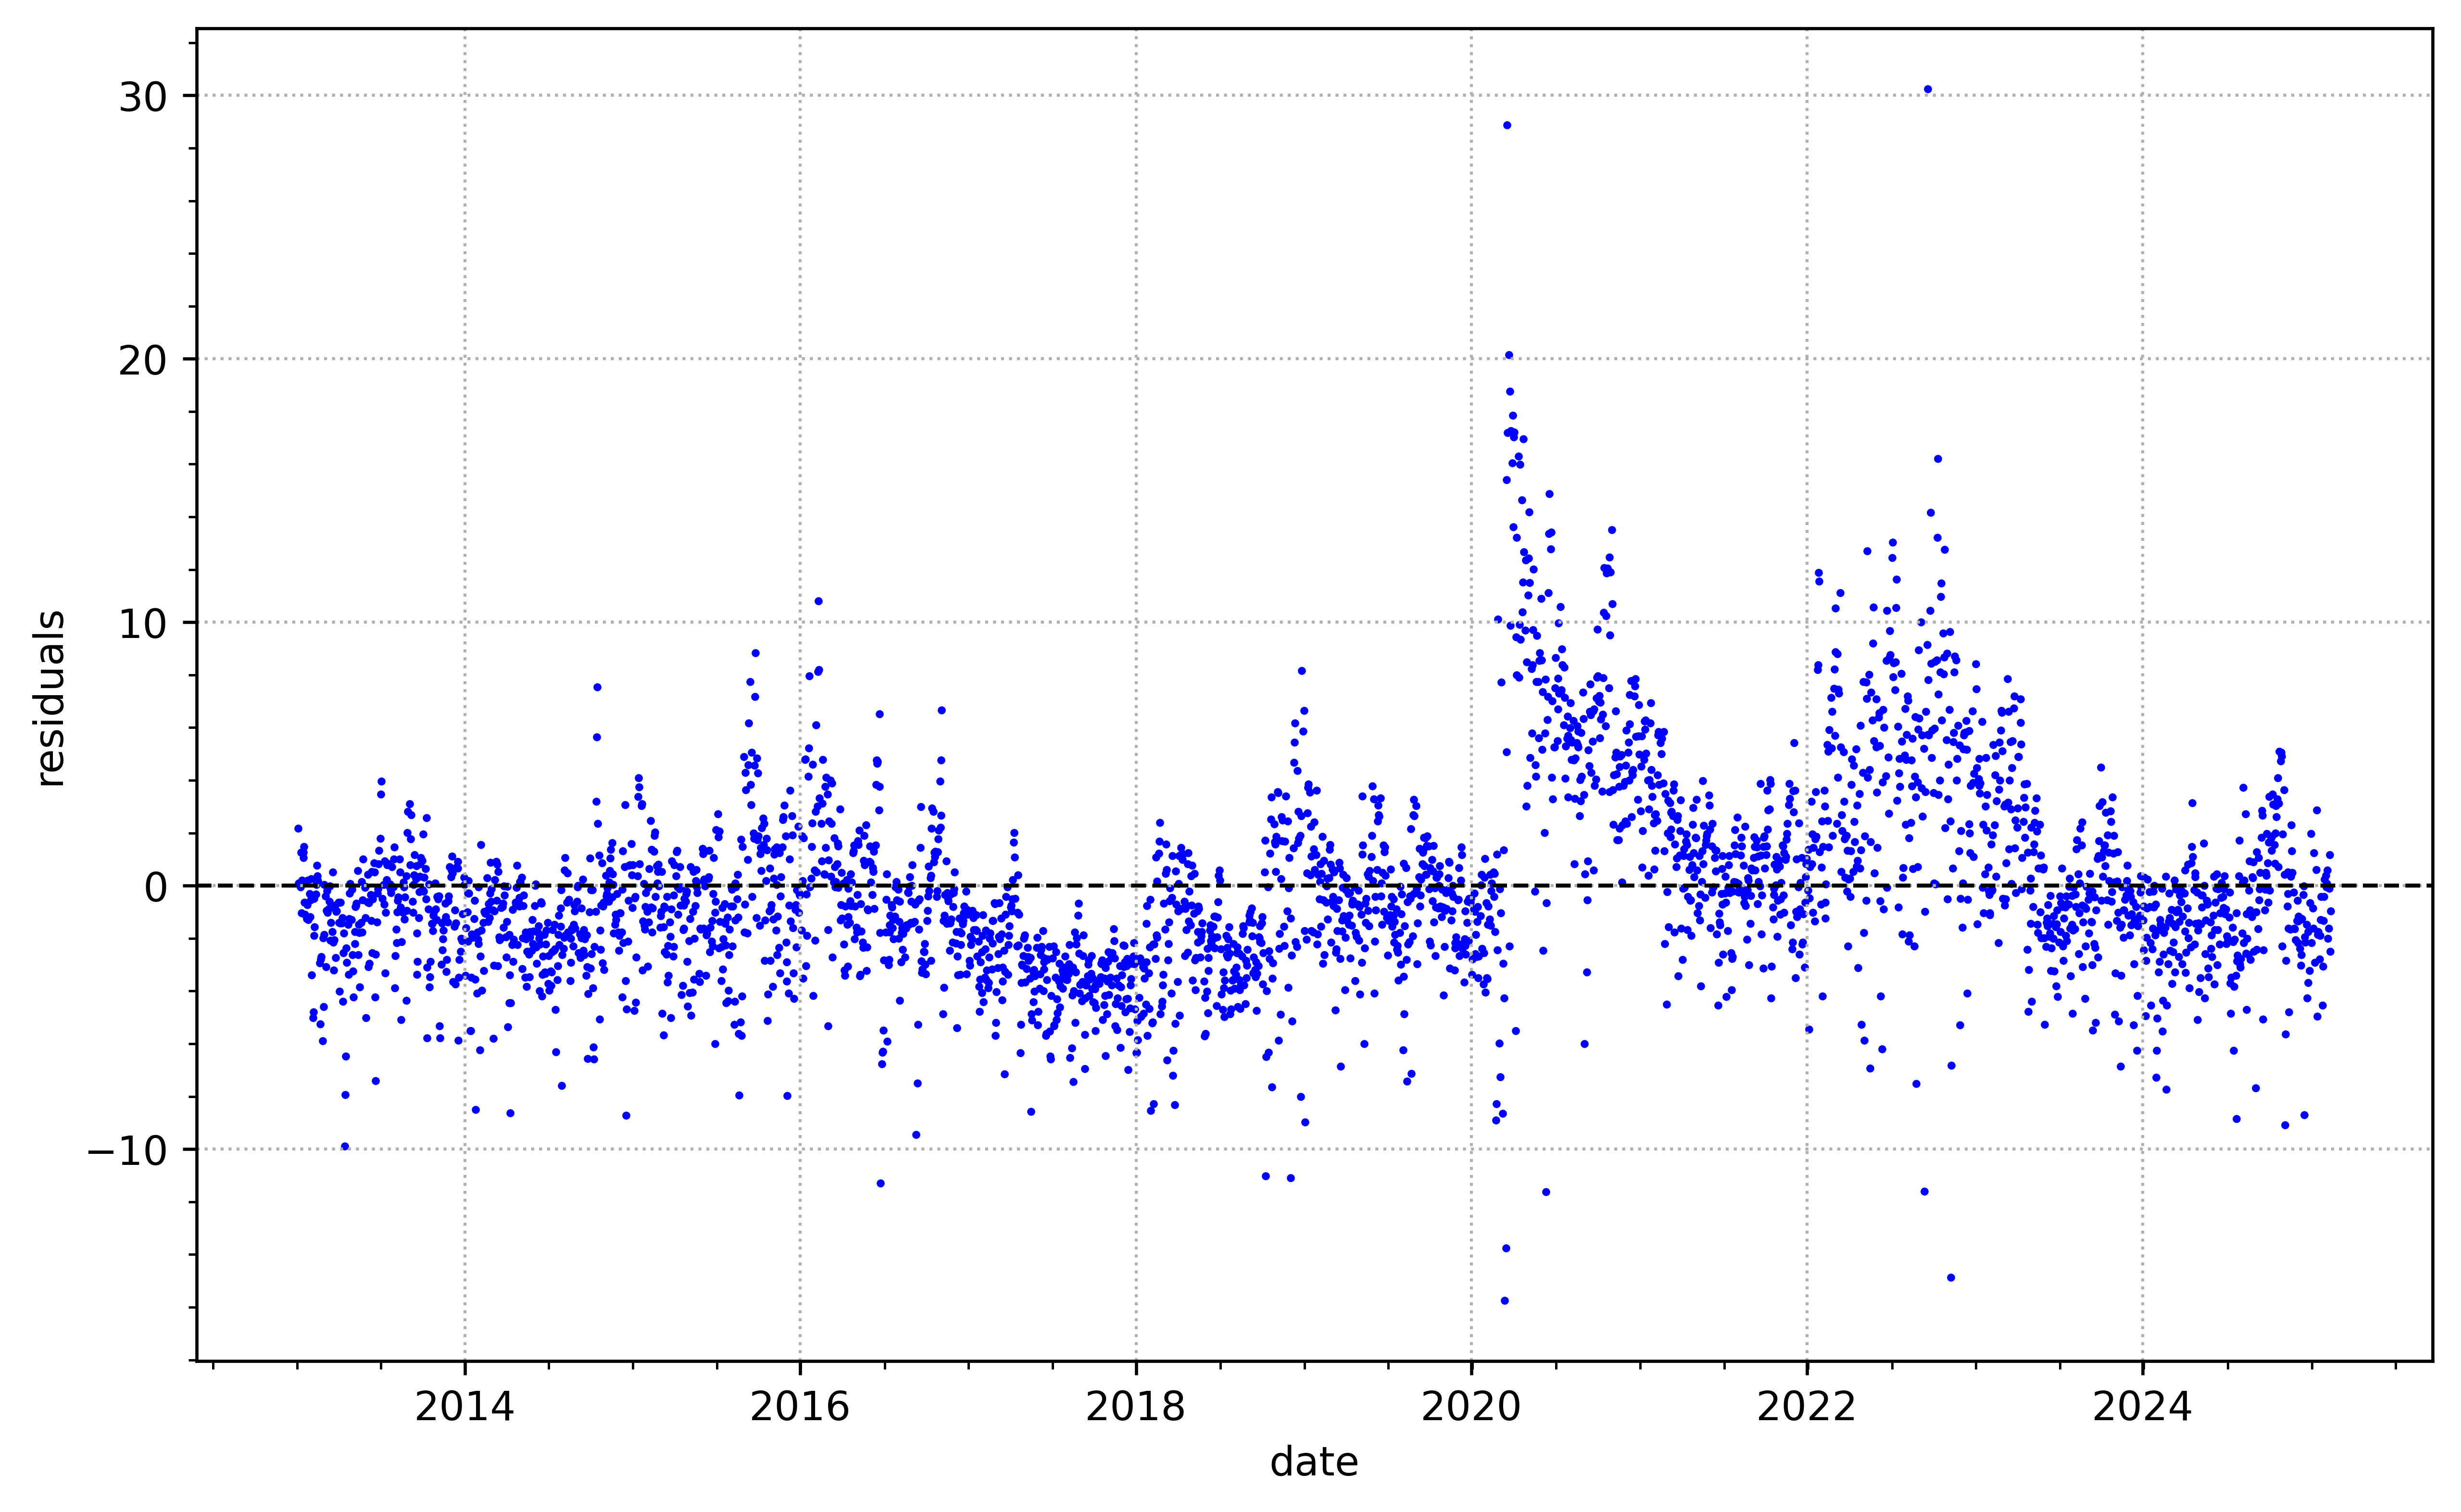

In [37]:
residuals_r = results_r.resid

plt.figure(figsize=(10, 6), dpi=600)
plt.scatter(data_30r.index, residuals_r,
            color='blue', marker='o', s=1)
plt.axhline(0, color='black', linestyle='--', linewidth=1)

plt.xlabel('date')
plt.ylabel('residuals')
plt.grid(True, linestyle=':', linewidth=0.75)
plt.minorticks_on()
plt.show()

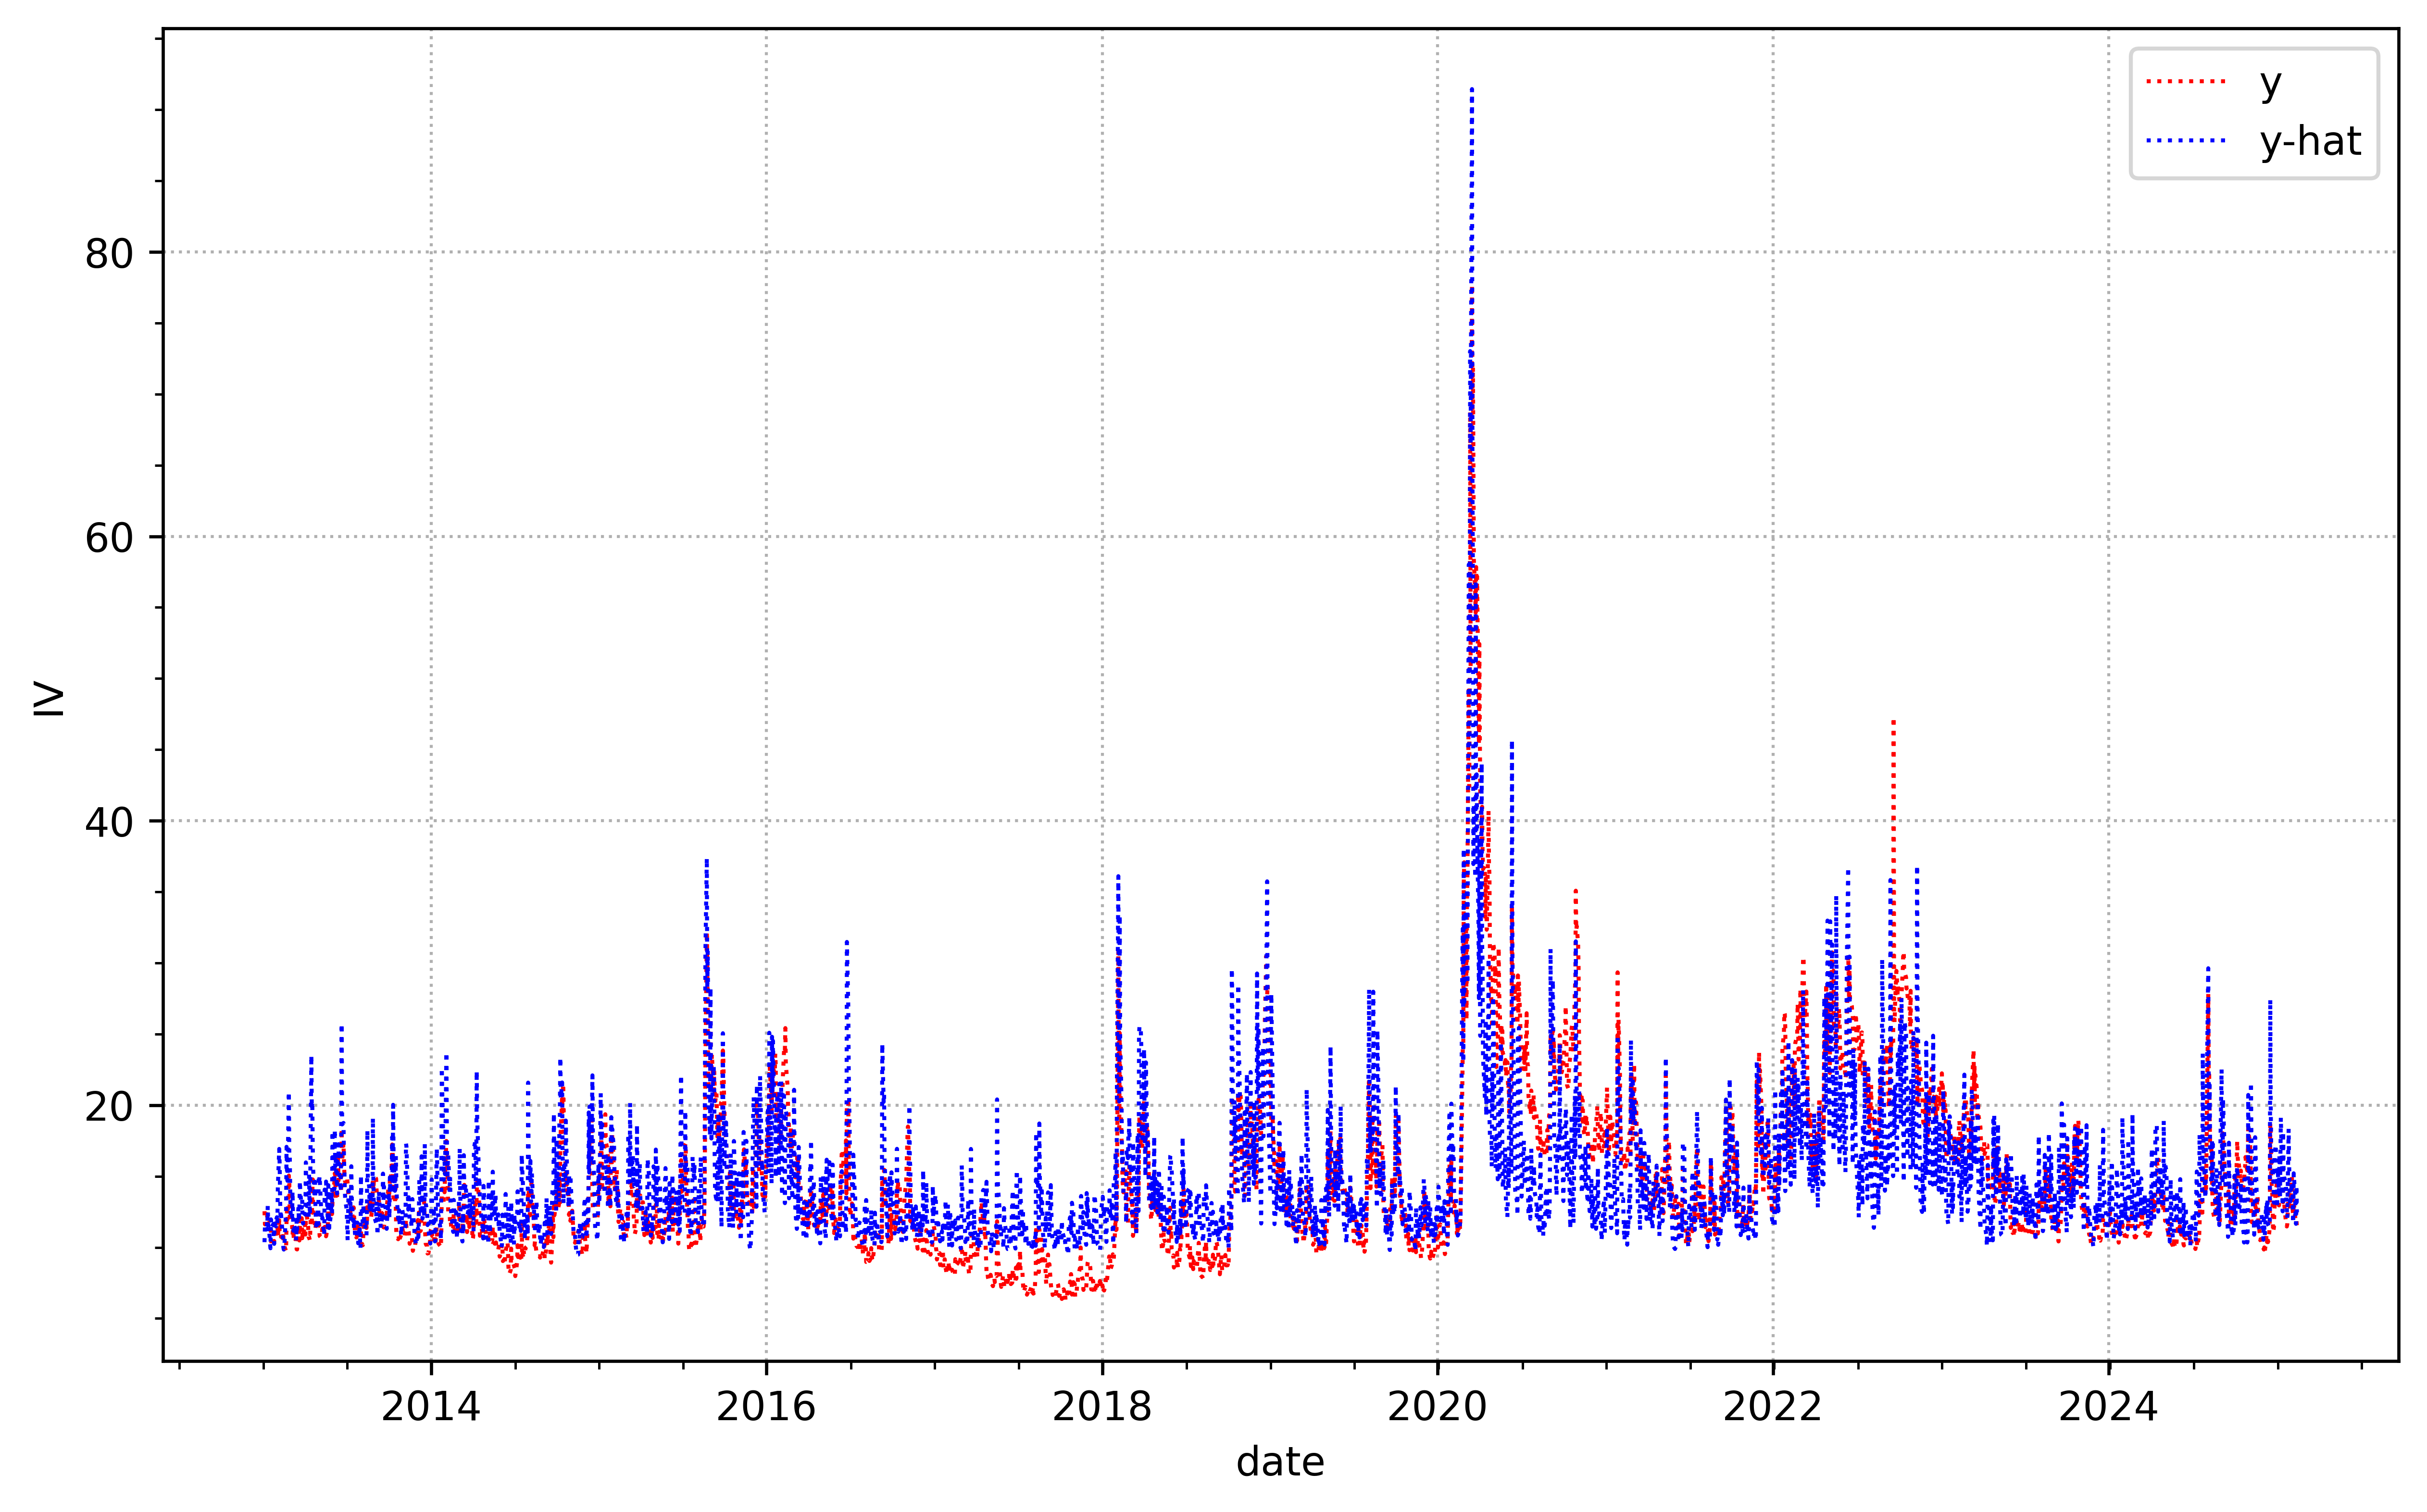

In [38]:
plt.figure(figsize=(10, 6), dpi=600)
plt.plot(data_30r.index, data_30r['30 day'], color='red', label='y', ls=':', linewidth=1)
plt.plot(data_30r.index, results_r.fittedvalues, color='blue', label='y-hat', ls=':', linewidth=1)
plt.xlabel('date')
plt.ylabel('IV')
plt.legend()
plt.grid(True, linestyle=':', linewidth=0.75)
plt.minorticks_on()
plt.show()